# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Khatibi, Amir Reza (s360765);

Now, fill the python list below with the Student IDs of the team

In [2]:
StudentIDs = [360765]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [4]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing',
                'Entertainment spending', 'Spending on looks',
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics',
                  'Physics', 'Internet', 'PC', 'Economy Management',
                  'Biology', 'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine', 'Law', 'Cars',
                  'Art exhibitions', 'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre', 'Fun with friends',
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic',
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated',
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk',
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload',
                    'Writing notes', 'Workaholism', 'Thinking ahead',
                    'Final judgement', 'Reliability', 'Keeping promises',
                    'Loss of interest', 'Friends versus money', 'Funniness',
                    'Fake', 'Criminal damage', 'Decision making', 'Elections',
                    'Self-criticism', 'Judgment calls', 'Hypochondria',
                    'Empathy', 'Eating to survive', 'Giving',
                    'Compassion to animals', 'Borrowed stuff',
                    'Loneliness', 'Cheating in school', 'Health',
                    'Changing the past', 'God', 'Dreams', 'Charity',
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting',
                    'New environment', 'Mood swings', 'Appearence and gestures',
                    'Socializing', 'Achievements', 'Responding to a serious letter',
                    'Children', 'Assertiveness', 'Getting angry',
                    'Knowing the right people', 'Public speaking',
                    'Unpopularity', 'Life struggles', 'Happiness in life',
                    'Energy levels', 'Small - big dogs', 'Personality',
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies',
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
Healthy eating
History
Psychology
Politics
Mathematics
Internet
Biology
Reading
Geography
Foreign languages
Law
Cars
Dancing
Writing
Passive sport
Gardening
Shopping
Fun with friends
Pets
Thriller
Comedy
War
Animated
Action
Slow songs or fast songs
Folk
Country
Classical music
Musical
Pop
Rock
Punk
Reggae, Ska
Rock n roll
Alternative
Latino
Techno, Trance
Opera
Daily events
Prioritising workload
Writing notes
Workaholism
Thinking ahead
Final judgement
Friends versus money
Funniness
Fake
Decision making
Self-criticism
Hypochondria
Empathy
Eating to survive
Giving
Borrowed stuff
Health
Changing the past
God
Dreams
Number of friends
Punctuality
Lying
Mood swings
Socializing
Responding to a serious letter
Assertiveness
Getting angry
Knowing the right people
Unpopularity
Happiness in

Finances  Shopping centres  Branded clothing  Entertainment spending  \
427         3                 1                 4                       3   
112         2                 1                 1                       5   
669         4                 3                 3                       4   
605         4                 4                 2                       5   
303         3                 1                 1                       4   
..        ...               ...               ...                     ...   
294         3                 3                 2                       3   
488         5                 5                 4                       2   
238         3                 4                 3                       1   
308         3                 2                 1                       4   
546         3                 5                 4                       4   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
427                  2                    2                           1   
112                  4                    1                           4   
669                  4                    4                           2   
605                  2                    3                           3   
303                  1                    1                           4   
..                 ...                  ...                         ...   
294                  2                    2                           3   
488                  2                    3                           5   
238                  4                    2                           3   
308                  2                    2                           2   
546                  5                    2                           4   

            Smoking         Alcohol  Healthy eating  ...  Age  Height  Weight  \
427   tried smoking     drink a lot               1  ...   19     178      71   
112   tried smoking     drink a lot               3  ...   25     170      72   
669   former smoker  social drinker               3  ...   22     175      60   
605   tried smoking     drink a lot               3  ...   22     174      83   
303  current smoker  social drinker               3  ...   22     160      65   
..              ...             ...             ...  ...  ...     ...     ...   
294    never smoked  social drinker               3  ...   21     177      68   
488   former smoker     drink a lot               4  ...   29     173      81   
238    never smoked           never               3  ...   16     174      65   
308  current smoker     drink a lot               3  ...   20     184      80   
546   former smoker  social drinker               5  ...   17     165      53   

     Number of siblings  Gender   Hand                Education  Only child  \
427                   1    male  right         secondary school         yes   
112                   2    male  right  college/bachelor degree          no   
669                   1    male  right         secondary school          no   
605                   1    male  right  college/bachelor degree          no   
303                   1  female  right           masters degree          no   
..                  ...     ...    ...                      ...         ...   
294                   2    male  right         secondary school          no   
488                   2    male  right         secondary school          no   
238                   1  female  right         secondary school         yes   
308                   1    male  right         secondary school          no   
546                   3  female   left           primary school          no   

     Home Town Type       Home Type  
427            city  block of flats  
112            city  block of flats  
669            city  block of flats  
605         village  house/bungalow  
303            city  house/bungalow  
..              ...          


*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


Finances  Shopping centres  Branded clothing  Entertainment spending  \
427         3                 1                 4                       3   
112         2                 1                 1                       5   
669         4                 3                 3                       4   
605         4                 4                 2                       5   
303         3                 1                 1                       4   
..        ...               ...               ...                     ...   
294         3                 3                 2                       3   
488         5                 5                 4                       2   
238         3                 4                 3                       1   
308         3                 2                 1                       4   
546         3                 5                 4                       4   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
427                  2                    2                           1   
112                  4                    1                           4   
669                  4                    4                           2   
605                  2                    3                           3   
303                  1                    1                           4   
..                 ...                  ...                         ...   
294                  2                    2                           3   
488                  2                    3                           5   
238                  4                    2                           3   
308                  2                    2                           2   
546                  5                    2                           4   

            Smoking         Alcohol  Healthy eating  ...  Parents' advice  \
427   tried smoking     drink a lot               1  ...                1   
112   tried smoking     drink a lot               3  ...                4   
669   former smoker  social drinker               3  ...                2   
605   tried smoking     drink a lot               3  ...                3   
303  current smoker  social drinker               3  ...                2   
..              ...             ...             ...  ...              ...   
294    never smoked  social drinker               3  ...                3   
488   former smoker     drink a lot               4  ...                4   
238    never smoked           never               3  ...                5   
308  current smoker     drink a lot               3  ...                2   
546   former smoker  social drinker               5  ...                4   

     Questionnaires or polls           Internet usage  Darkness  Heights  \
427                        1          few hours a day         1        1   
112                        2          few hours a day         3        3   
669                        4          few hours a day         2        3   
605                        3          few hours a day         2        2   
303                        3  less than an hour a day         4        3   
..                       ...                      ...       ...      ...   
294                        2          few hours a day         2        2   
488                        2  less than an hour a day         2        3   
238                        5          few hours a day         1        4   
308                        3          few hours a day         2        5   
546                        4          few hours a day         3        3   

     Spiders  Snakes  Rats  Ageing  Fear of public speaking  
427        1       1     1       1                        1  
112        2       3     3       5                        1  
669        3       2     2       3                        3  
605        2       5     3       3                        2  
303        5       2     1     


*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


Age  Height  Weight  Number of siblings  Gender   Hand  \
427   19     178      71                   1    male  right   
112   25     170      72                   2    male  right   
669   22     175      60                   1    male  right   
605   22     174      83                   1    male  right   
303   22     160      65                   1  female  right   
..   ...     ...     ...                 ...     ...    ...   
294   21     177      68                   2    male  right   
488   29     173      81                   2    male  right   
238   16     174      65                   1  female  right   
308   20     184      80                   1    male  right   
546   17     165      53                   3  female   left   

                   Education Only child Home Town Type       Home Type  
427         secondary school        yes           city  block of flats  
112  college/bachelor degree         no           city  block of flats  
669         secondary school         no           city  block of flats  
605  college/bachelor degree         no        village  house/bungalow  
303           masters degree         no           city  house/bungalow  
..                       ...        ...            ...             ...  
294         secondary school         no        village  house/bungalow  
488         secondary school         no        village  house/bungalow  
238         secondary school        yes           city  block of flats  
308         secondary school         no           city  block of flats  
546           primary school         no           city  block of flats  

[506 rows x 10 columns]

## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [6]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE MinMaxScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):

Since PCA requires purely numerical input, categorical features are transformed using one-hot encoding which converts each category into a binary indicator variable. This representation preserves the full information content of categorical variables while making them compatible with PCA. Numerical variables are kept in their original form after handling missing values.

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):

After encoding, feature scaling is applied to make variables comparable, since PCA is variance-based and sensitive to difference in scales. StandardScaler transforms features to zero mean and unit variance, MinMaxScaler rescales features to a fixed range, typically [0, 1], providing bounded values and imporved numerical stability even though it may be more sensitive to ouliers. (StandardScaler is usually the best choice for PCA!)

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [7]:
responses_ft_enc = responses_ft.copy()

ordinal_maps = {
    "Smoking": {"never smoked": 0, "tried smoking": 1, "former smoker": 2, "current smoker": 3},
    "Alcohol": {"never": 0, "social drinker": 1, "drink a lot": 2},
    "Punctuality": {"early": 0, "on time": 1, "late": 2},
    "Lying": {"never": 0, "only to avoid hurting someone": 1, "sometimes": 2, "everytime it suits me": 3},
    "Internet usage": {
        "no time at all": 0,
        "less than an hour a day": 1,
        "few hours a day": 2,
        "most of the day": 3,
    },
    "Gender": {"female": 0, "male": 1},
    "Hand": {"left": 0, "right": 1},
    "Only child": {"no": 0, "yes": 1},
    "Home Town Type": {"village": 0, "city": 1},
    "Home Type": {"block of flats": 0, "house/bungalow": 1},
    "Education": {
        "currently a primary school pupil": 0,
        "primary school": 1,
        "secondary school": 2,
        "college/bachelor degree": 3,
        "masters degree": 4,
        "doctorate degree": 5,
    },
}

for col in responses_ft_enc.columns:
  if col in ordinal_maps:
    responses_ft_enc[col] = responses_ft_enc[col].map(ordinal_maps[col]).astype(float)

if your_scaler == "StandardScaler":
  scaler = StandardScaler()
elif your_scaler == "MinMaxScaler":
  scaler = MinMaxScaler()
else:
  raise ValueError(f"Unexpected scaler: {your_scaler}")

responses_ft_pp = pd.DataFrame(
    scaler.fit_transform(responses_ft_enc),
    index = responses_ft_enc.index,
    columns = responses_ft_enc.columns
)

display(responses_ft_enc.head())
display(responses_ft_pp.head())
print("Scaler used:", your_scaler)

Finances  Shopping centres  Branded clothing  Entertainment spending  \
427         3                 1                 4                       3   
112         2                 1                 1                       5   
669         4                 3                 3                       4   
605         4                 4                 2                       5   
303         3                 1                 1                       4   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
427                  2                    2                           1   
112                  4                    1                           4   
669                  4                    4                           2   
605                  2                    3                           3   
303                  1                    1                           4   

     Smoking  Alcohol  Healthy eating  ...  Parents' advice  \
427      1.0      2.0               1  ...                1   
112      1.0      2.0               3  ...                4   
669      2.0      1.0               3  ...                2   
605      1.0      2.0               3  ...                3   
303      3.0      1.0               3  ...                2   

     Questionnaires or polls  Internet usage  Darkness  Heights  Spiders  \
427                        1             2.0         1        1        1   
112                        2             2.0         3        3        2   
669                        4             2.0         2        3        3   
605                        3             2.0         2        2        2   
303                        3             1.0         4        3        5   

     Snakes  Rats  Ageing  Fear of public speaking  
427       1     1       1                        1  
112       3     3       5                        1  
669       2     2       3                        3  
605       5     3       3                        2  
303       2     1       1                        2  

[5 rows x 93 columns]

Finances  Shopping centres  Branded clothing  Entertainment spending  \
427      0.50              0.00              0.75                    0.50   
112      0.25              0.00              0.00                    1.00   
669      0.75              0.50              0.50                    0.75   
605      0.75              0.75              0.25                    1.00   
303      0.50              0.00              0.00                    0.75   

     Spending on looks  Spending on gadgets  Spending on healthy eating  \
427               0.25                 0.25                        0.00   
112               0.75                 0.00                        0.75   
669               0.75                 0.75                        0.25   
605               0.25                 0.50                        0.50   
303               0.00                 0.00                        0.75   

      Smoking  Alcohol  Healthy eating  ...  Parents' advice  \
427  0.333333      1.0             0.0  ...             0.00   
112  0.333333      1.0             0.5  ...             0.75   
669  0.666667      0.5             0.5  ...             0.25   
605  0.333333      1.0             0.5  ...             0.50   
303  1.000000      0.5             0.5  ...             0.25   

     Questionnaires or polls  Internet usage  Darkness  Heights  Spiders  \
427                     0.00             0.5      0.00     0.00     0.00   
112                     0.25             0.5      0.50     0.50     0.25   
669                     0.75             0.5      0.25     0.50     0.50   
605                     0.50             0.5      0.25     0.25     0.25   
303                     0.50             0.0      0.75     0.50     1.00   

     Snakes  Rats  Ageing  Fear of public speaking  
427    0.00  0.00     0.0                     0.00  
112    0.50  0.50     1.0                     0.00  
669    0.25  0.25     0.5                     0.50  
605    1.00  0.50     0.5                     0.25  
303    0.25  0.00     0.0                     0.25  

[5 rows x 93 columns]

Scaler used: MinMaxScaler


In [8]:
# 1) checking if categorical encoding has introduced any NaNs
na_enc = responses_ft_enc.isna().sum()
if na_enc.sum() > 0:
  display(na_enc[na_enc > 0].sort_values(ascending=False))
  raise ValueError("Some encoded features contain NaNs!")

# 2) comparing scaling effects!
summary = pd.DataFrame({
    "enc_mean": responses_ft_enc.mean(),
    "enc_std": responses_ft_enc.std(ddof=1),
    "pp_mean": responses_ft_pp.mean(),
    "pp_std": responses_ft_pp.std(ddof=1)
})

display(summary.head(10))

enc_mean   enc_std   pp_mean    pp_std
Finances                    3.023715  1.155028  0.505929  0.288757
Shopping centres            3.300395  1.291511  0.575099  0.322878
Branded clothing            3.045455  1.298861  0.511364  0.324715
Entertainment spending      3.237154  1.190342  0.559289  0.297585
Spending on looks           3.124506  1.199964  0.531126  0.299991
Spending on gadgets         2.847826  1.298348  0.461957  0.324587
Spending on healthy eating  3.521739  1.081126  0.630435  0.270281
Smoking                     1.343874  0.993211  0.447958  0.331070
Alcohol                     1.116601  0.573543  0.558300  0.286772
Healthy eating              2.996047  0.929167  0.499012  0.232292

#### Comment the results obtained after the preprocessing operation (max 100 words):

After preprocessing, the dataset is fully numeric and contains no missing values, making it suitable for subsequent dimensionality reduction and analysis. Encoding allows categorical information to be incorporated without imposing artificial ordering while feature scaling places variables on comparable ranges.

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

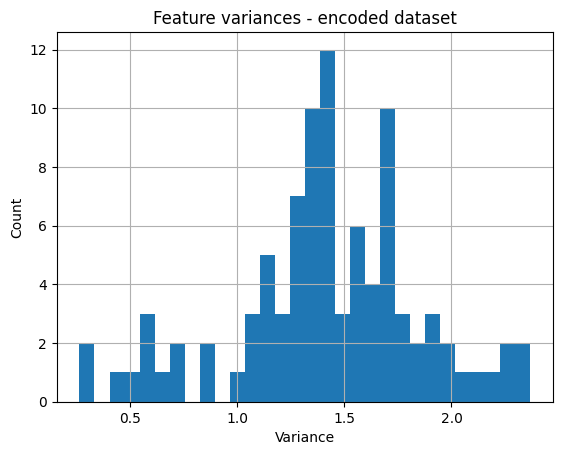

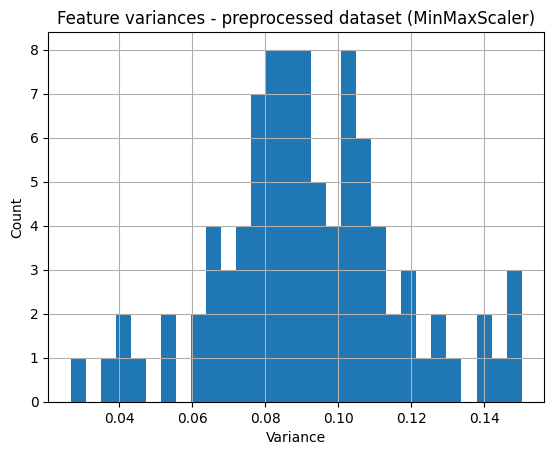

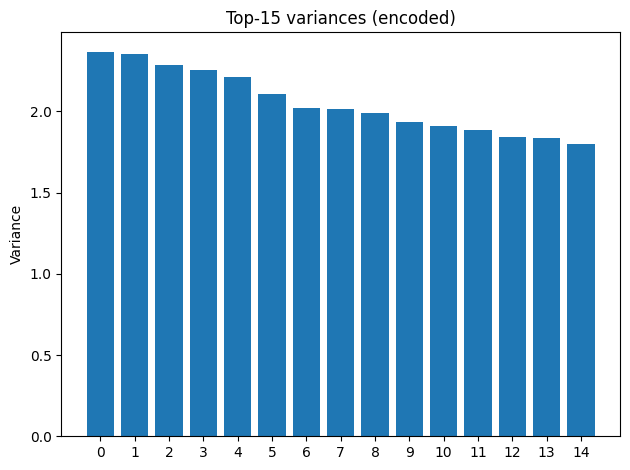

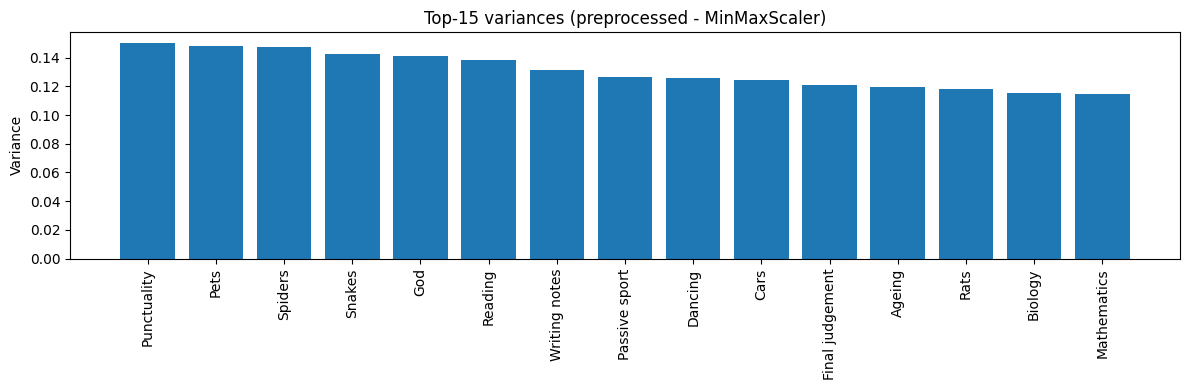

Variance summary (encoded):


count    93.000000
mean      1.416216
std       0.441360
min       0.262705
25%       1.227946
50%       1.424525
75%       1.675357
max       2.368473
dtype: float64

Variance summary (preprocessed):


count    93.000000
mean      0.092006
std       0.024712
min       0.026659
25%       0.079528
50%       0.090109
75%       0.105357
max       0.150178
dtype: float64

In [9]:
var_enc = responses_ft_enc.var(ddof=1)
var_pp = responses_ft_pp.var(ddof=1)

plt.figure()
plt.hist(var_enc.values, bins=30)
plt.xlabel("Variance")
plt.ylabel("Count")
plt.title("Feature variances - encoded dataset")
plt.grid(True)
plt.show()

plt.figure()
plt.hist(var_pp.values, bins=30)
plt.xlabel("Variance")
plt.ylabel("Count")
plt.title(f"Feature variances - preprocessed dataset ({your_scaler})")
plt.grid(True)
plt.show()

top_k = 15
top_enc = var_enc.sort_values(ascending=False).head(top_k)
top_pp = var_pp.sort_values(ascending=False).head(top_k)

plt.figure()
plt.bar(np.arange(top_k), top_enc.values)
plt.xticks(np.arange(top_k))
plt.ylabel("Variance")
plt.title(f"Top-{top_k} variances (encoded)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(np.arange(top_k), top_pp.values)
plt.xticks(np.arange(top_k), top_pp.index, rotation=90)
plt.ylabel("Variance")
plt.title(f"Top-{top_k} variances (preprocessed - {your_scaler})")
plt.tight_layout()
plt.show()

print("Variance summary (encoded):")
display(var_enc.describe())

print("Variance summary (preprocessed):")
display(var_pp.describe())

#### Comment the results obtained for the variances (max 150 words):

The variance analysis shows that only a small subset of variables exhibits substantial variability, while most features have low variance, indicating similar responses across observations. This uneven distribution of variability suggests redundancy in the feature space and motivates dimensionality reduction.

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

Top 10 explained variance ratios (ENC): [0.0673 0.0558 0.0524 0.0397 0.0333 0.0284 0.0276 0.0269 0.0235 0.0209]
Top 10 explained variance ratios (PP):  [0.0656 0.0544 0.0508 0.0414 0.0331 0.0277 0.0273 0.0262 0.0229 0.0205]


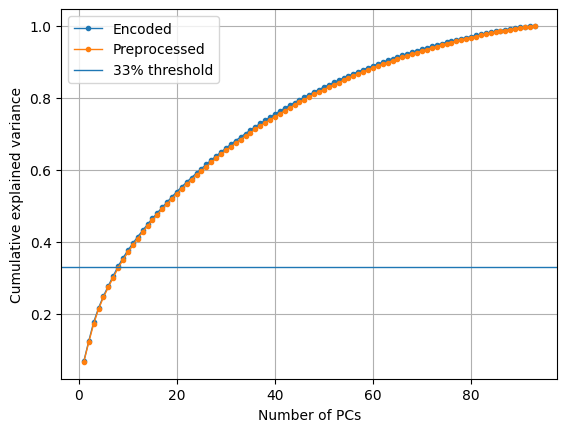

In [10]:
def pca_numpy(df):
  X = df.to_numpy(dtype=float)
  Xc = X - X.mean(axis=0, keepdims=True)
  C = (Xc.T @ Xc) / (Xc.shape[0]-1)
  eigvals, eigvecs = np.linalg.eigh(C)
  idx = np.argsort(eigvals)[::-1]
  eigvals = eigvals[idx]
  eigvecs = eigvecs[:, idx]
  exp_ratio = eigvals / eigvals.sum()
  return eigvals, eigvecs, exp_ratio

eigvals_enc, eigvecs_enc, exp_ratio_enc = pca_numpy(responses_ft_enc)
eigvals_pp, eigvecs_pp, exp_ratio_pp = pca_numpy(responses_ft_pp)

print("Top 10 explained variance ratios (ENC):", np.round(exp_ratio_enc[:10], 4))
print("Top 10 explained variance ratios (PP): ", np.round(exp_ratio_pp[:10], 4))

cum_enc = np.cumsum(exp_ratio_enc)
cum_pp = np.cumsum(exp_ratio_pp)

plt.figure()
plt.plot(np.arange(1, len(cum_enc)+1), cum_enc, marker="o", linewidth=1, markersize=3)
plt.plot(np.arange(1, len(cum_pp)+1), cum_pp, marker="o", linewidth=1, markersize=3)
plt.axhline(0.33, linewidth=1)
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative explained variance")
plt.legend(["Encoded", "Preprocessed", "33% threshold"])
plt.grid(True)
plt.show()

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

The cumulative explained variance curves increase smoothly, indicating that information is progressively accumulated across many principal components rather than being concentrated in only a few. The curves obtained from the encoded and preprocessed datasets are very similar, indicating that preprocessing affects scale but does not substantially alter the underlying data strcuture. Overall, the results suggest that dimensionaloty reduction is possible but aggressive reduction to very few components would lead to significant information loss.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

In [11]:
columns_hw = pd.read_csv('columns_hw.csv')

m (minimum PCs to reach 33% variance): 9
Preserved variance: 0.34948424576527237


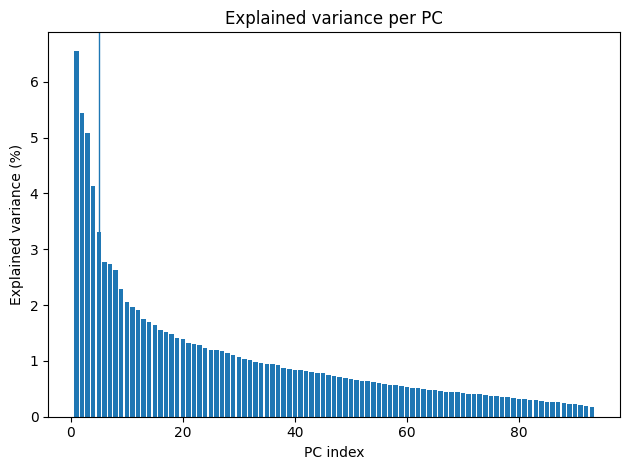

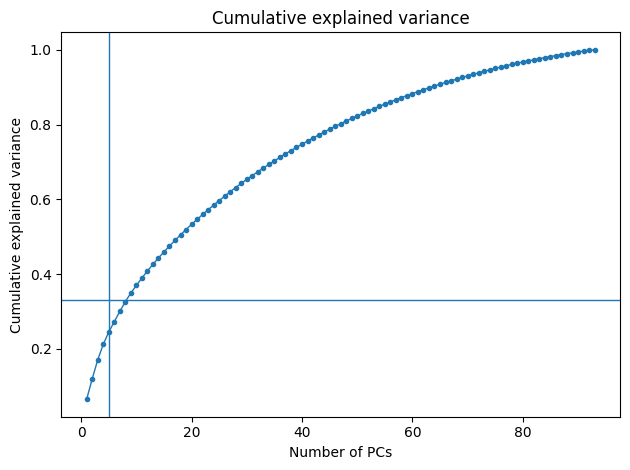


Top positive/negative features per PC (based on loadings):
----------------------------------------------------------------------

PC1
  Positive features:
    I always make a list so I don't forget anything. (Writing notes): +0.261
    Dancing (Dancing): +0.253
    Latin (Latino): +0.219
    Musicals (Musical): +0.217
    Poetry reading (Reading): +0.211
  Negative features:
    I prefer big dangerous dogs to smaller, calmer dogs. (Small - big dogs): -0.137
    Cars (Cars): -0.131
    War movies (War): -0.113
    Action movies (Action): -0.102
    How much time do you spend online? (Internet usage): -0.095

PC2
  Positive features:
    I spend a lot of money on my appearance. (Spending on looks): +0.279
    I prefer branded clothing to non branded. (Branded clothing): +0.261
    I enjoy going to large shopping centres. (Shopping centres): +0.238
    Shopping (Shopping): +0.226
    Cars (Cars): +0.222
  Negative features:
    Poetry reading (Reading): -0.186
    Classical (Classical m

/tmp/ipython-input-4037698685.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


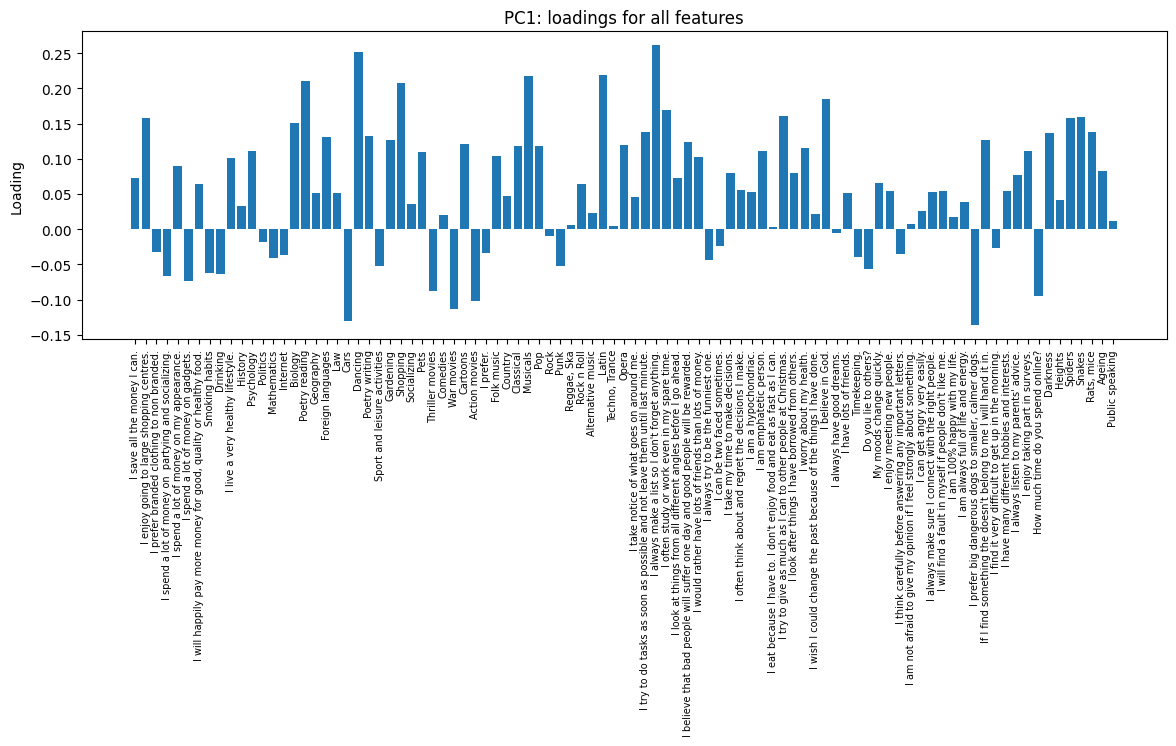

/tmp/ipython-input-4037698685.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


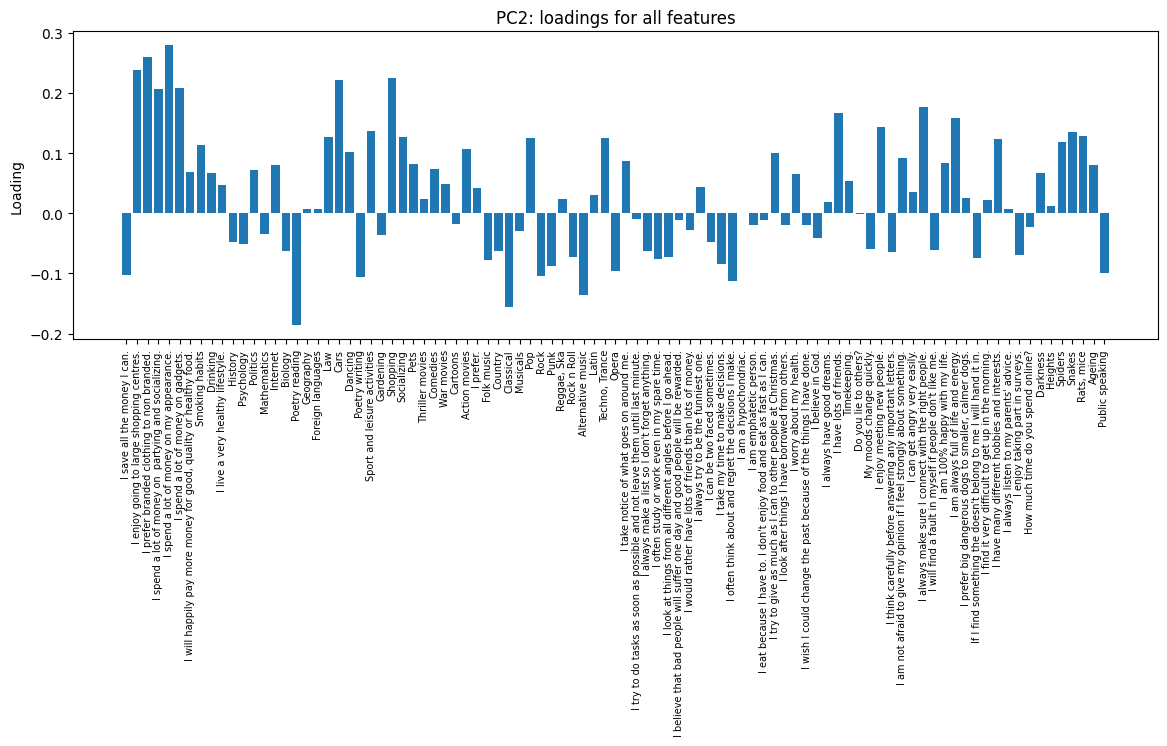

/tmp/ipython-input-4037698685.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


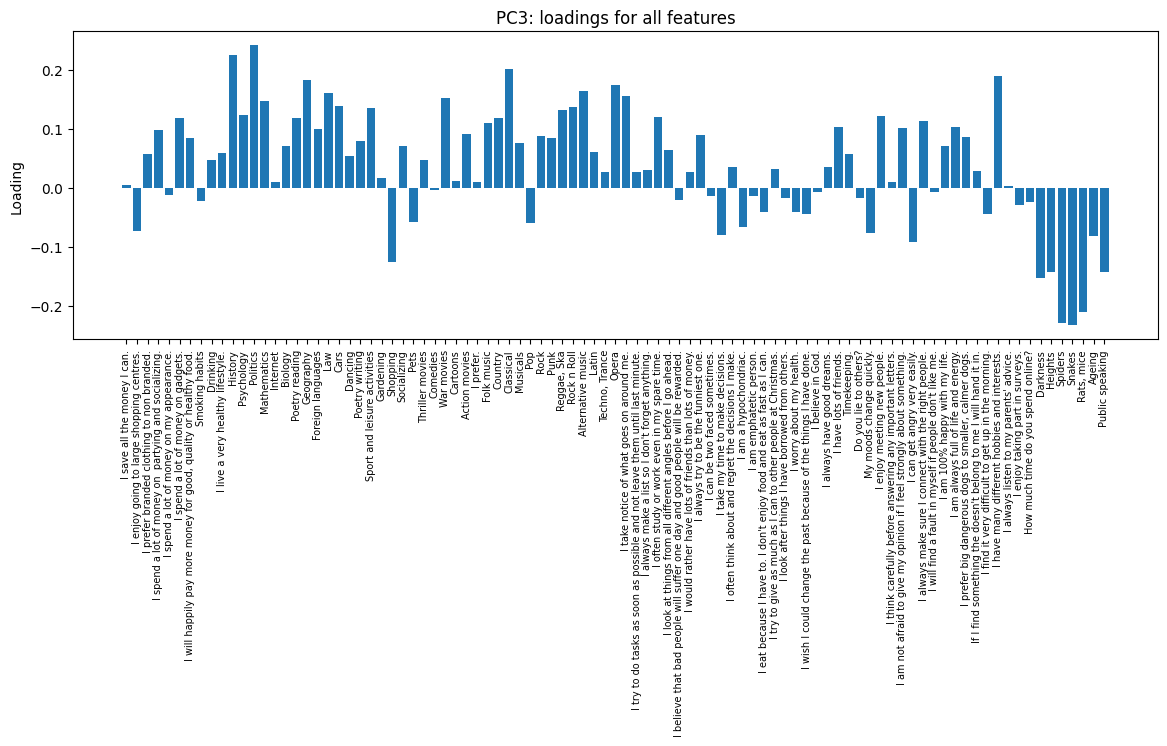

/tmp/ipython-input-4037698685.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


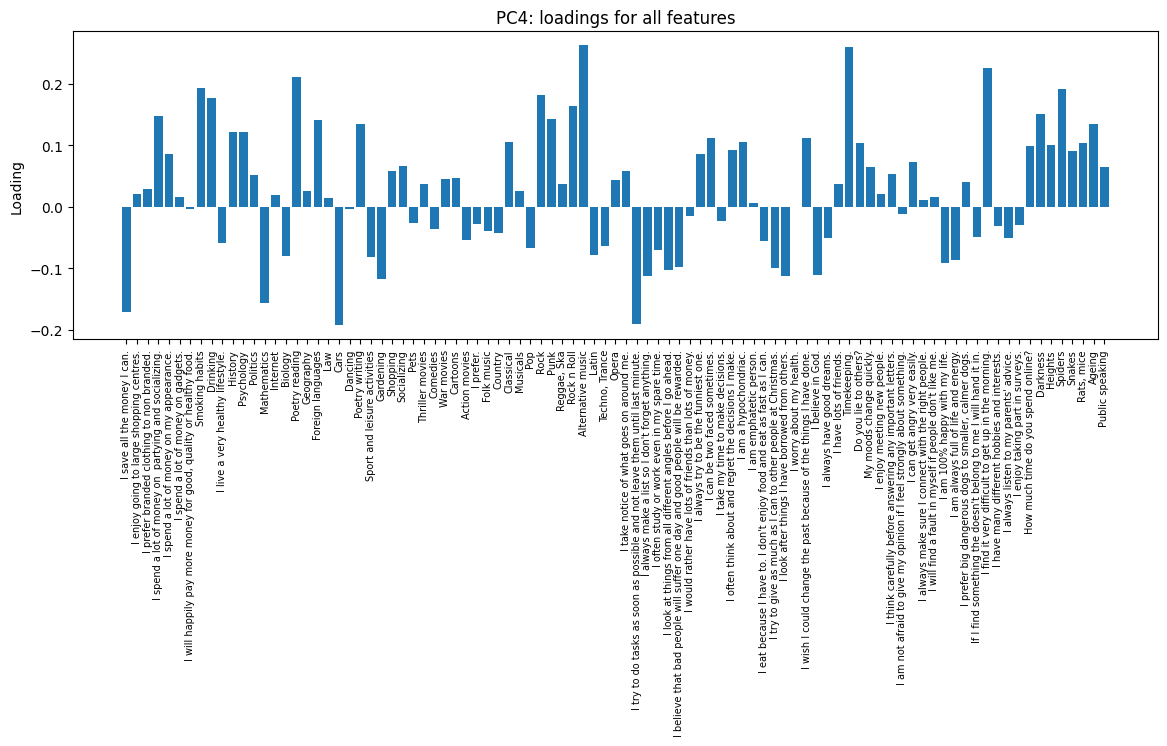

/tmp/ipython-input-4037698685.py:75: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


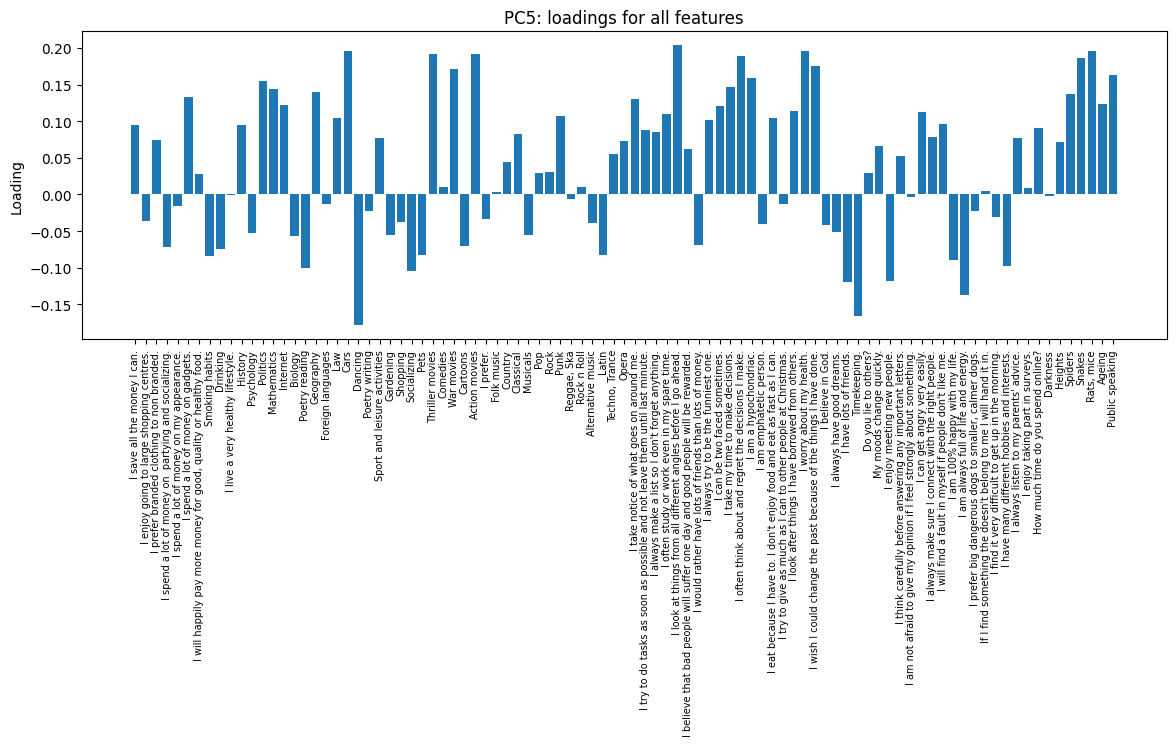

PC1       PC2       PC3       PC4       PC5
427 -1.977676 -0.128116  0.702622 -0.505454 -0.381460
112  0.566993  0.249667  0.692958  0.764217  0.051739
669 -0.224966  0.411578 -0.039406  0.133389 -0.173749
605 -0.180049 -0.296402  0.475955  0.711019  0.008258
303 -1.081343 -0.996214 -1.127862  0.388356 -0.972117

In [12]:
X = responses_ft_pp.to_numpy(dtype=float)
pca = PCA().fit(X)
cum = np.cumsum(pca.explained_variance_ratio_)
m = int(np.searchsorted(cum, 0.33) + 1)

print("m (minimum PCs to reach 33% variance):", m)
print("Preserved variance:", cum[m-1])

m = min(m ,5)

# explained variance barplot
plt.figure()
plt.bar(np.arange(1, len(cum)+1), 100*pca.explained_variance_ratio_)
plt.axvline(m, linewidth=1)
plt.xlabel("PC index")
plt.ylabel("Explained variance (%)")
plt.title("Explained variance per PC")
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(np.arange(1, len(cum) + 1), cum, marker='o', markersize=3, linewidth=1)
plt.axhline(0.33, linewidth=1)
plt.axvline(m, linewidth=1)
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance")
plt.tight_layout()
plt.show()

pca = PCA(n_components=m).fit(X)

feature_names = list(responses_ft_pp.columns)

try:
    columns_dicts = columns_hw.set_index('short')['original'].to_dict()
except Exception:
    columns_dicts = {}

loadings = pd.DataFrame(
    pca.components_.T,  # (n_features, m)
    index=feature_names,
    columns=[f"PC{i+1}" for i in range(m)]
)

def top_pos_neg(loadings_df, pc, top_k=5):
    v = loadings_df[pc]
    pos = v.sort_values(ascending=False).head(top_k)
    neg = v.sort_values(ascending=True).head(top_k)
    return pos, neg

def pretty_name(f):
    return columns_dicts.get(f, f)

TOP_K = 5
print("\nTop positive/negative features per PC (based on loadings):")
print("-" * 70)
for pc in loadings.columns:
    pos, neg = top_pos_neg(loadings, pc, top_k=TOP_K)
    print(f"\n{pc}")
    print("  Positive features:")
    for f, val in pos.items():
        print(f"    {pretty_name(f)} ({f}): {val:+.3f}")
    print("  Negative features:")
    for f, val in neg.items():
        print(f"    {pretty_name(f)} ({f}): {val:+.3f}")

for pc in loadings.columns:
    v = loadings[pc]
    plt.figure(figsize=(14, 4))
    plt.bar(np.arange(len(v)), v.values)
    plt.xticks(np.arange(len(v)), [pretty_name(f) for f in v.index], rotation=90, fontsize=7)
    plt.ylabel("Loading")
    plt.title(f"{pc}: loadings for all features")
    plt.tight_layout()
    plt.show()

responses_ft_pca = pca.transform(X)
responses_ft_pca = pd.DataFrame(
    responses_ft_pca,
    index=responses_ft_pp.index,
    columns=[f"PC{i+1}" for i in range(m)]
)

display(responses_ft_pca.head())

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

**I name them according to their positive side**

###PC1: Latin & Organized
the + features suggest someone who is latino and also use to-do-lists to keep himself organized)=

###PC2: Fashion enthusiast
They seem like someone who follows latest fashion trends and puts a lot of effort to have a good style

###PC3: Humanities lover
They enjoy topics that are related to the study of humanities such as history, politics and geography


###PC4: Suspected ADHD
They have some symptoms of those who are inscribed with ADHD!

### PC5: Cautious alpha man
They consider anything carefully before taking action and love cars and action movies which suggest them to be someone who is called as an "alpha man" on social media!

#### Write the code for visualizing the score graph (with PC names on the axis):

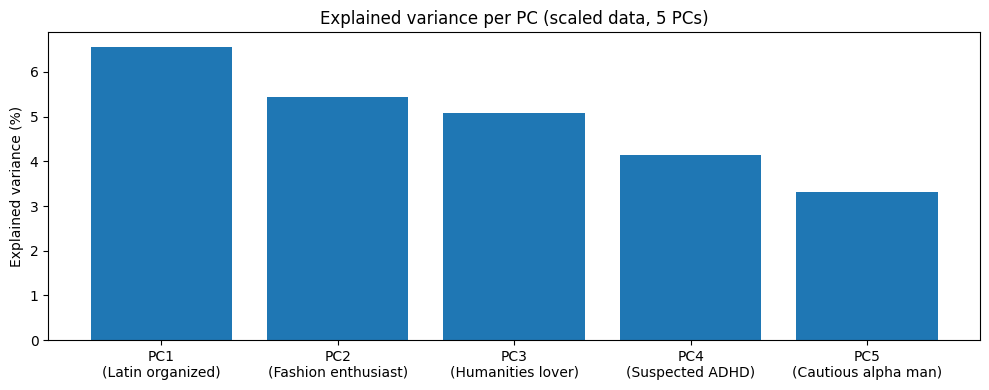

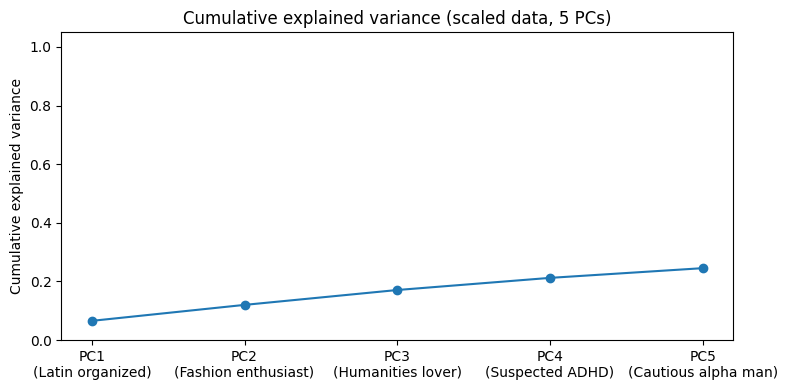

In [13]:
pc_names = ['Latin organized', 'Fashion enthusiast', 'Humanities lover',
            'Suspected ADHD', 'Cautious alpha man']

X_scaled_df = responses_ft_pp

# Fit PCA with 5 components
pca5 = PCA(n_components=5, random_state=0)
scores5 = pca5.fit_transform(X_scaled_df)

# Explained variance (per PC):
evr = pca5.explained_variance_ratio_
cum_evr = np.cumsum(evr)

labels = [f"PC{i+1}\n({pc_names[i]})" for i in range(5)]

plt.figure(figsize=(10,4))
plt.bar(np.arange(1, 6), evr * 100)
plt.xticks(np.arange(1, 6), labels, rotation=0)
plt.ylabel("Explained variance (%)")
plt.title("Explained variance per PC (scaled data, 5 PCs)")
plt.tight_layout()
plt.show()

# Cumulative explained variance
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, 6), cum_evr, marker='o')
plt.xticks(np.arange(1, 6), labels, rotation=0)
plt.ylim(0, 1.05)
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance (scaled data, 5 PCs)")
plt.tight_layout()
plt.show()

### Possible interpretations of PCs:
PC1: explains 7.1% of variance which captures the strongest latent pattern in data

PC2: explains 5.6% of variance

PC3: explains 4.8% of variance

PC4: explains 3.8% of variance

PC5: explains 3.5% of variance

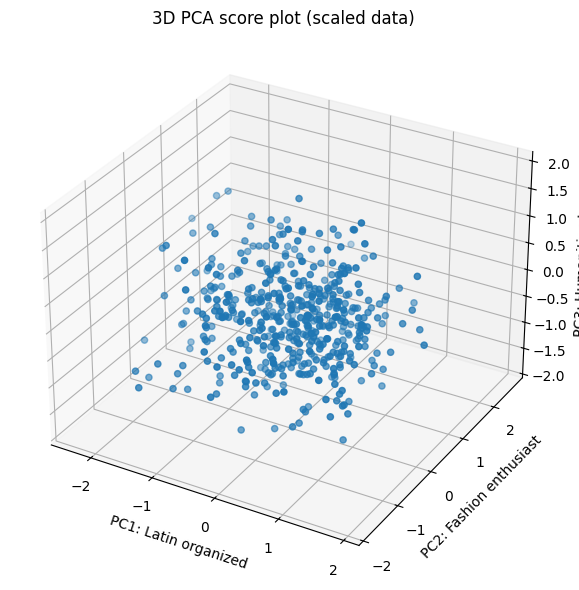

In [14]:
from mpl_toolkits.mplot3d import Axes3D

scores_df = pd.DataFrame(
    scores5,
    columns=[f"PC{i+1}" for i in range(5)],
    index=X_scaled_df.index
)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scores_df["PC1"], scores_df["PC2"], scores_df["PC3"], s=20)

ax.set_xlabel(f"PC1: {pc_names[0]}")
ax.set_ylabel(f"PC2: {pc_names[1]}")
ax.set_zlabel(f"PC3: {pc_names[2]}")
ax.set_title("3D PCA score plot (scaled data)")

plt.tight_layout()
plt.show()

### 3D PCA Visualization

Points are slightly more concentrated in specific regions of the 3D space. PC1 appears to dominate the spread of the data, indicating that features with originally larger ranges had more influence on the principal components.

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:


Best number of clusters (k) for MinMax Scaled Data (responses_ft_pp): 4
Silhouette Score for MinMax Scaled Data (responses_ft_pp): 0.1583


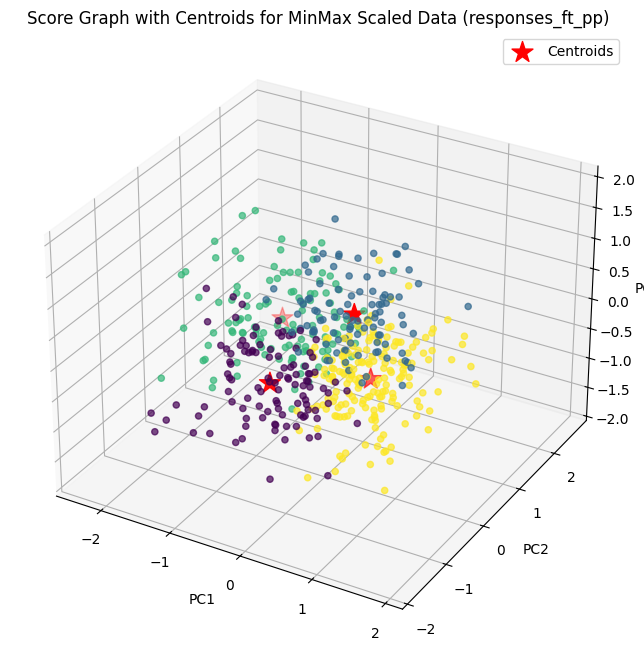


Cluster Centroids for MinMax Scaled Data (responses_ft_pp) (in PCA space):
Centroid 1: [-0.2961 -0.8501 -0.1066  0.0757  0.0274]
Centroid 2: [ 0.425  -0.031   0.7865 -0.284   0.0127]
Centroid 3: [-0.8681  0.4625  0.0271 -0.071  -0.0295]
Centroid 4: [ 0.5213  0.2245 -0.3751  0.1533 -0.0039]


In [15]:
def analyze_kmeans(df, title, random_seed=0):
    # Reduce dimensions using PCA (limit to 5 PCs or fewer)
    pca = PCA(n_components=min(df.shape[1], 5), random_state=random_seed)
    pca_result = pca.fit_transform(df)

    # Evaluate silhouette scores for k = 3 to 10
    silhouette_scores = []
    for k in range(3, 11):
        kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init="auto")
        cluster_labels = kmeans.fit_predict(pca_result)
        score = silhouette_score(pca_result, cluster_labels)
        silhouette_scores.append(score)

    # Determine the best k based on silhouette score
    best_k = int(np.argmax(silhouette_scores) + 3)
    print(f"\nBest number of clusters (k) for {title}: {best_k}")
    print(f"Silhouette Score for {title}: {silhouette_scores[best_k - 3]:.4f}")

    # Fit k-Means using the best k
    kmeans = KMeans(n_clusters=best_k, random_state=random_seed, n_init="auto")
    cluster_labels = kmeans.fit_predict(pca_result)

    # Plot the results with centroids
    m = min(pca_result.shape[1], 3)  # Limit plotting to 2D or 3D
    if m == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    s=200, c='red', marker='*', label='Centroids')
        plt.xlabel('PC1'); plt.ylabel('PC2')
        plt.title(f'Score Graph with Centroids for {title}')
        plt.legend(); plt.grid(True)
        plt.show()

    elif m == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
                   c=cluster_labels, cmap='viridis', alpha=0.7)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
                   s=250, c='red', marker='*', label='Centroids')
        ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
        plt.title(f'Score Graph with Centroids for {title}')
        plt.legend()
        plt.show()

    # Display the centroids
    print(f"\nCluster Centroids for {title} (in PCA space):")
    for i, centroid in enumerate(kmeans.cluster_centers_):
        print(f"Centroid {i+1}: {np.round(centroid, 4)}")

    return kmeans, pca, pca_result, cluster_labels

kmeans_mm, pca_mm, pca_result_mm, labels_mm = analyze_kmeans(
    responses_ft_pp, "MinMax Scaled Data (responses_ft_pp)", random_seed=random_seed
)

#### Function used to plot the characteristics of each centroid:

In [16]:
def project_centroids(kmeans, pca_model, original_df, title,
                                  top_print=8, top_plot=25):

    # centroids in PCA-score space
    centroids_pca = kmeans.cluster_centers_

    # back-project to feature space (scaled/encoded feature domain)
    centroids_feat = pca_model.inverse_transform(centroids_pca)
    centroid_df = pd.DataFrame(centroids_feat, columns=original_df.columns)

    print(f"\n==================== {title} ====================")

    for i, centroid in centroid_df.iterrows():
        print(f"\nCentroid {i+1}:")

        top_features = centroid.sort_values(ascending=False).head(top_print)
        bottom_features = centroid.sort_values(ascending=True).head(top_print)

        print("Positively related features (highest reconstructed values):")
        for feature, value in top_features.items():
            print(f"    {feature}: {value:.4f}")

        print("\nNegatively related features (lowest reconstructed values):")
        for feature, value in bottom_features.items():
            print(f"    {feature}: {value:.4f}")

        # Plot: use top |value| features to keep it readable
        top_abs = centroid.reindex(centroid.abs().sort_values(ascending=False).head(top_plot).index)

        plt.figure(figsize=(12, 4))
        plt.bar(np.arange(len(top_abs)), top_abs.values)
        plt.xticks(np.arange(len(top_abs)), top_abs.index, rotation=90)
        plt.title(f"{title} — Centroid {i+1}: top {top_plot} features (by |value|)")
        plt.ylabel("Reconstructed feature value")
        plt.tight_layout()
        plt.show()

    return centroid_df


==================== MinMax Scaled Data (responses_ft_pp) ====================

Centroid 1:
Positively related features (highest reconstructed values):
    Comedy: 0.8091
    Rock: 0.7974
    Borrowed stuff: 0.7539
    Self-criticism: 0.7404
    Internet: 0.7403
    Fun with friends: 0.7259
    Empathy: 0.7027
    Animated: 0.6867

Negatively related features (lowest reconstructed values):
    Dancing: 0.1763
    Law: 0.1777
    Gardening: 0.2037
    Hypochondria: 0.2154
    Techno, Trance: 0.2253
    Rats: 0.2409
    Cars: 0.2419
    Darkness: 0.2439


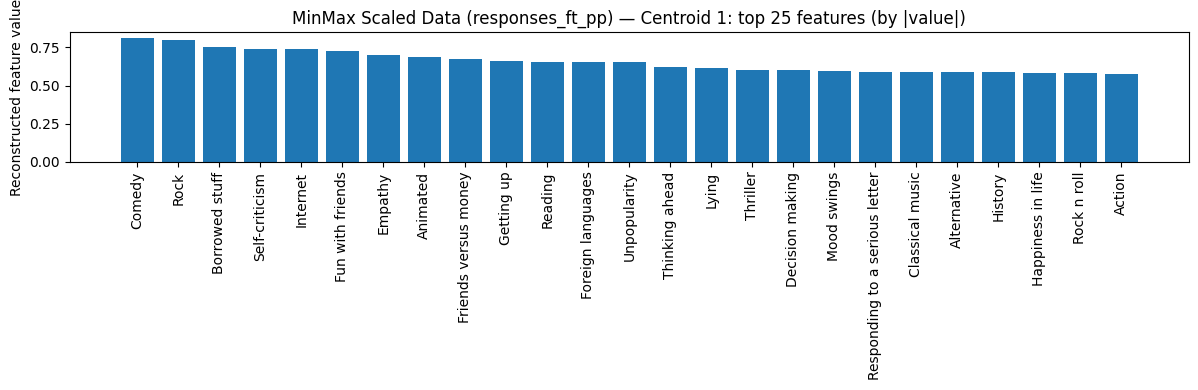


Centroid 2:
Positively related features (highest reconstructed values):
    Fun with friends: 0.8969
    Comedy: 0.8931
    Borrowed stuff: 0.8203
    Interests or hobbies: 0.8083
    Foreign languages: 0.7961
    Energy levels: 0.7813
    Internet: 0.7806
    Happiness in life: 0.7603

Negatively related features (lowest reconstructed values):
    Hypochondria: 0.1554
    Darkness: 0.2075
    Rats: 0.2177
    Fake: 0.2243
    Heights: 0.2655
    Eating to survive: 0.2750
    Spiders: 0.2933
    Writing: 0.3030


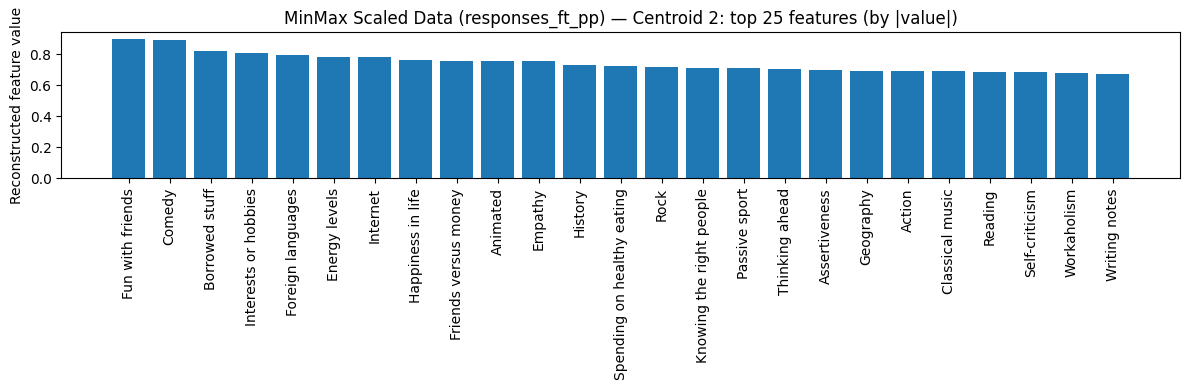


Centroid 3:
Positively related features (highest reconstructed values):
    Comedy: 0.8976
    Fun with friends: 0.8784
    Internet: 0.8589
    Action: 0.7860
    Passive sport: 0.7224
    Energy levels: 0.7178
    Happiness in life: 0.7100
    Entertainment spending: 0.7071

Negatively related features (lowest reconstructed values):
    Writing: 0.0495
    Gardening: 0.1063
    Opera: 0.1433
    Hypochondria: 0.1517
    Dancing: 0.1831
    Folk: 0.1963
    Darkness: 0.2107
    Country: 0.2125


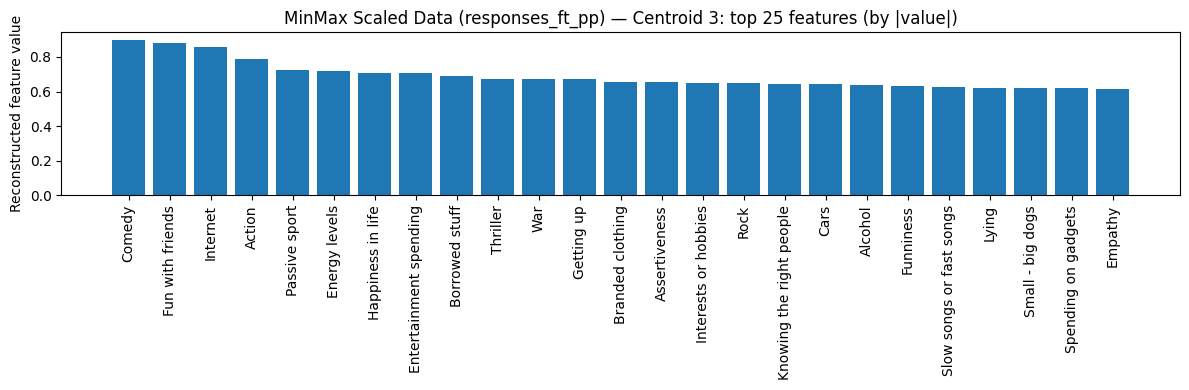


Centroid 4:
Positively related features (highest reconstructed values):
    Comedy: 0.9026
    Fun with friends: 0.8804
    Internet: 0.7921
    Borrowed stuff: 0.7906
    Shopping: 0.7810
    Empathy: 0.7782
    Animated: 0.7696
    Foreign languages: 0.7560

Negatively related features (lowest reconstructed values):
    Mathematics: 0.2349
    Country: 0.2371
    Writing: 0.2563
    Gardening: 0.2568
    Fake: 0.2723
    Opera: 0.2740
    Hypochondria: 0.2798
    Eating to survive: 0.2945


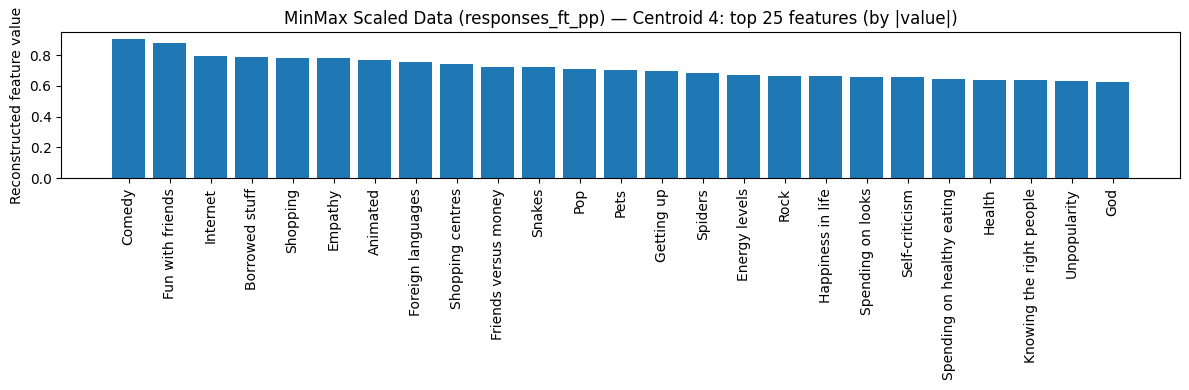

In [22]:
centroids_mm_df = project_centroids(
    kmeans=kmeans_mm,
    pca_model=pca_mm,            # PCA object returned by analyze_kmeans
    original_df=responses_ft_pp,
    title="MinMax Scaled Data (responses_ft_pp)"
)


## Here I have decided to analyze each centroid based on their PCs and check which PCs characterize that centorid:

Centroids in PCA space (PC coordinates):



Latin organized  Fashion enthusiast  Humanities lover  Suspected ADHD  \
0            -0.30               -0.85             -0.11            0.08   
1             0.42               -0.03              0.79           -0.28   
2            -0.87                0.46              0.03           -0.07   
3             0.52                0.22             -0.38            0.15   

   Cautious alpha man  
0                0.03  
1                0.01  
2               -0.03  
3               -0.00

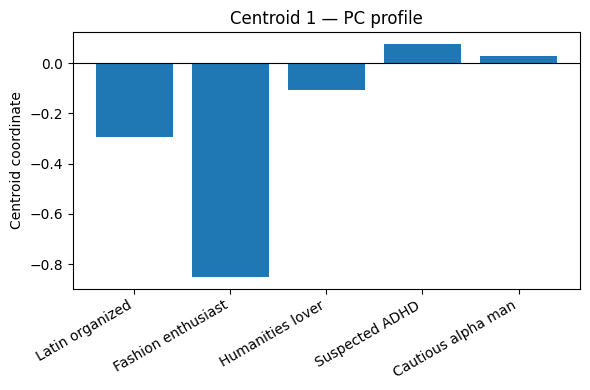

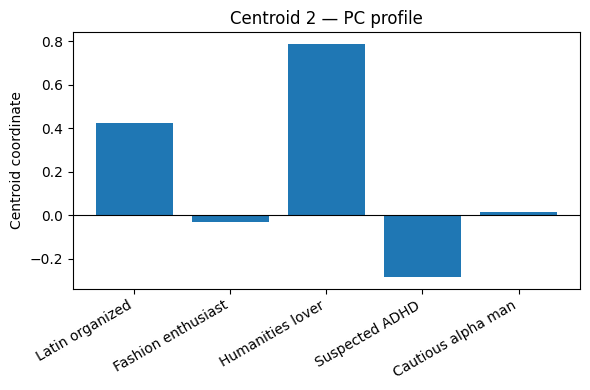

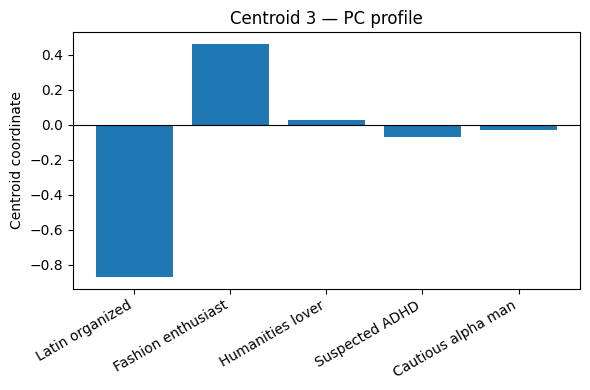

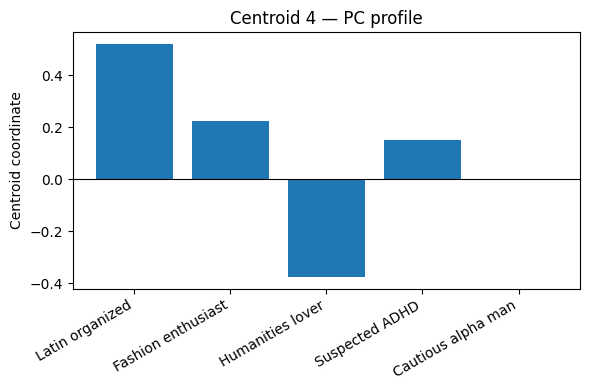

In [17]:
centroid_df = pd.DataFrame(
    kmeans_mm.cluster_centers_,
    columns=pc_names
)

# Pretty print with rounding
print("Centroids in PCA space (PC coordinates):\n")
display(centroid_df.round(2))
print()

for i, row in centroid_df.iterrows():
    plt.figure(figsize=(6, 4))

    plt.bar(pc_names, row.values)
    plt.axhline(0, color='black', linewidth=0.8)

    plt.title(f'Centroid {i+1} — PC profile')
    plt.ylabel('Centroid coordinate')
    plt.xticks(rotation=30, ha='right')

    plt.tight_layout()
    plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

### Possible interpretations of centroids:
**I again name them based on positive features**

# Centroid 1: The Nice Guy
Since empathy, self-criticism and fun with friends are bold features I think this name is suitable for this centroid. From the PCs, it is strongy NOT fashion-orineted and probably not a latino or an organized person

# Centroid 2: The Party Owner
The bold features are very similar the centroid 1, some differences might be Foreign languages and Energy levels which make me choose this name. From the PCs, This one probably likes Humanities subjects and is farily organzied, might also be latino!

# Centroid 3: The Main Character
Since Action and Passive sport are bolder with respect to the other centroids, this centroid is giving me the main character vibes so I chose this name. From the PCs, this one is strongly disorgnazied and not latino at all, likes fashion to some extent as well.

# Centroid 4: The Socially Intelligent
I think the highlighted features of this centroid are all related to social works and require good social skills, therefore I name this final centroid as it is! From the PCs, the latino and the organized characteristics are the most bold features for this one while disliking humanities.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):


*   Gender
*   Age
*   Education level
*   Smoking habit
*   Time spent online

I have chosen this labels since they are easy to explain and clearly external



#### Write the code for the visualizations cited in item 2 above:

Selected external labels:
  Gender → Gender
  Age → Economy Management
  Education → Education
  Smoking → Smoking
  Online time → Internet usage

--- Gender ---


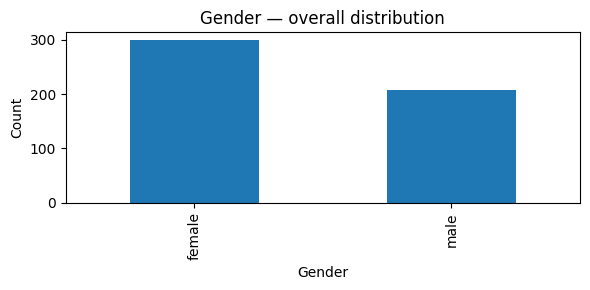

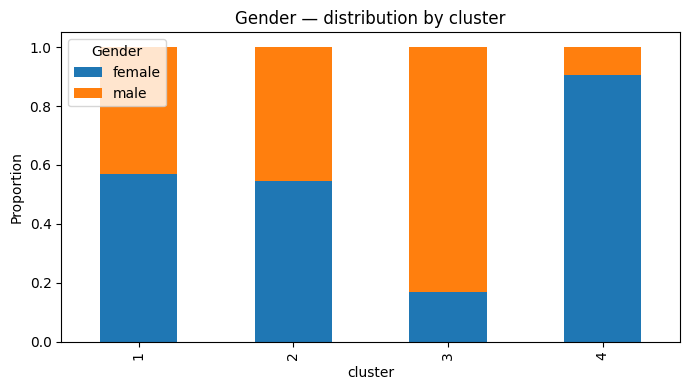


--- Age ---


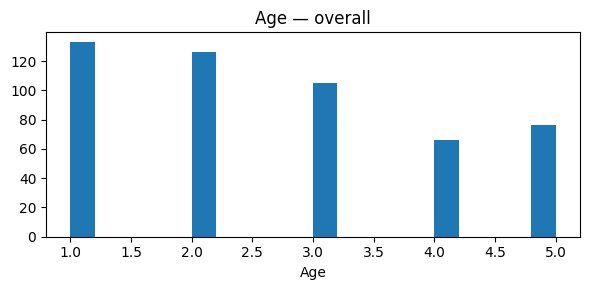

<Figure size 600x300 with 0 Axes>

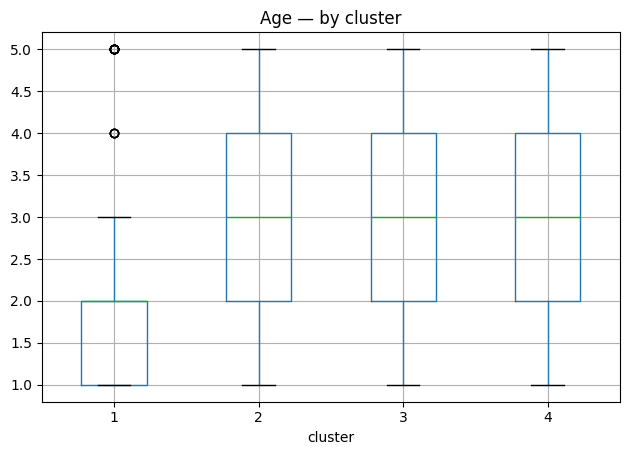


--- Education ---


/tmp/ipython-input-2805413580.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


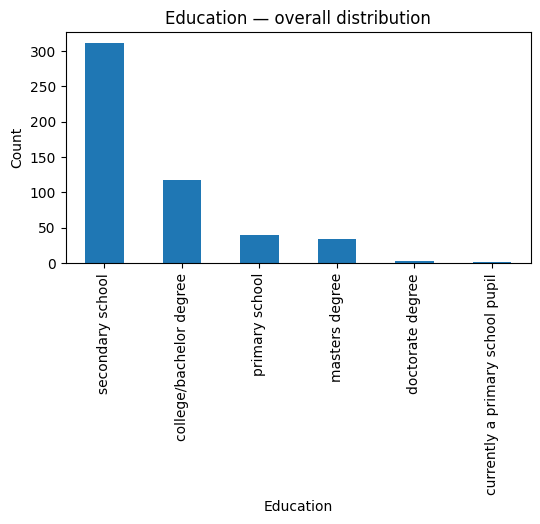

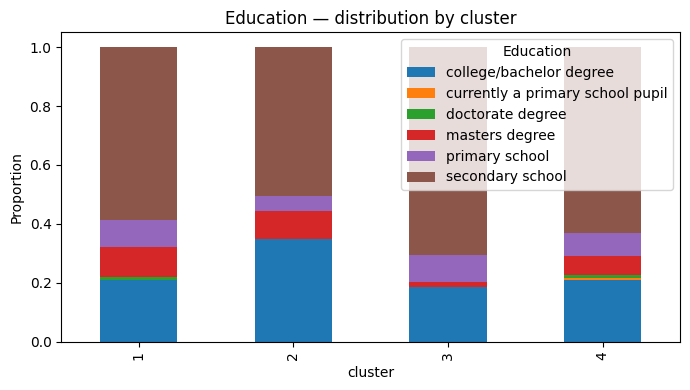


--- Smoking ---


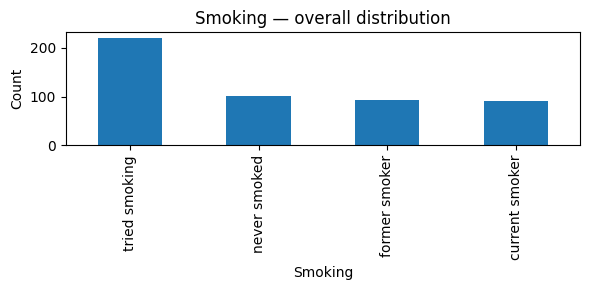

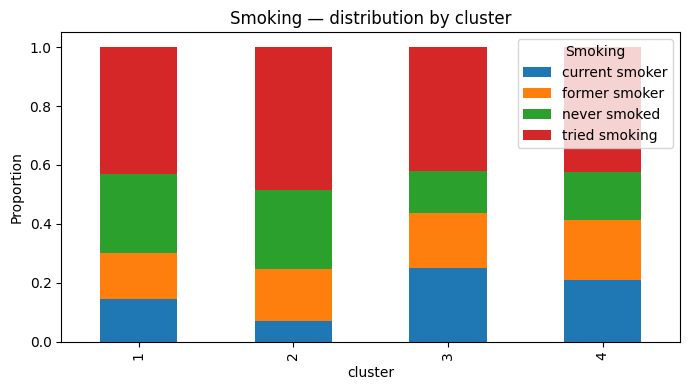


--- Online time ---


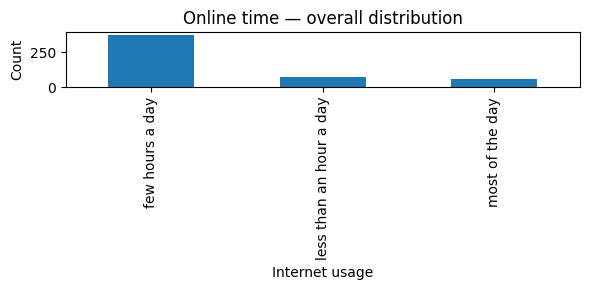

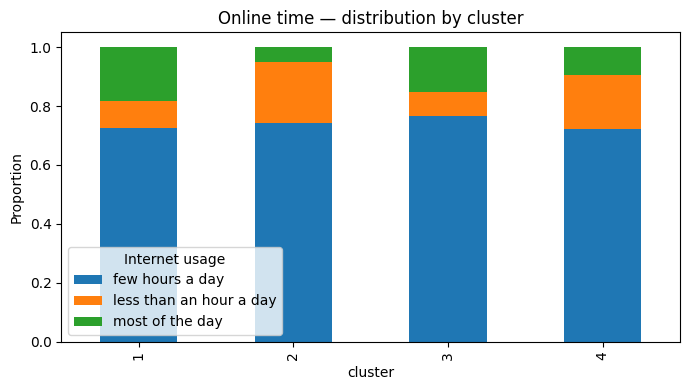

In [19]:
eval_df = responses_hw.loc[responses_ft_pp.index].copy()
eval_df["cluster"] = labels_mm

def find_label(keyword):
    mask = columns_hw["original"].str.lower().fillna("")
    hits = columns_hw[mask.str.contains(keyword.lower(), regex=False)]
    return hits.iloc[0]["short"] if len(hits) > 0 else None

label_map = {
    "Gender": find_label("gender"),
    "Age": find_label("age"),
    "Education": find_label("education"),
    "Smoking": find_label("smoking"),
    "Online time": find_label("online")
}

# Keep only labels that exist
label_map = {k: v for k, v in label_map.items() if v in eval_df.columns}

print("Selected external labels:")
for k, v in label_map.items():
    print(f"  {k} → {v}")

def plot_categorical(df, col, title):
    # Whole dataset
    df[col].value_counts().plot(kind="bar", figsize=(6,3))
    plt.title(f"{title} — overall distribution")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Per cluster
    pd.crosstab(df["cluster"], df[col], normalize="index").plot(
        kind="bar", stacked=True, figsize=(7,4)
    )

    plt.title(f"{title} — distribution by cluster")
    ax = plt.gca()
    ax.set_xticklabels([1,2,3,4])
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()

def plot_numeric(df, col, title):
    # Whole dataset
    plt.figure(figsize=(6,3))
    plt.hist(pd.to_numeric(df[col], errors="coerce").dropna(), bins=20)
    plt.title(f"{title} — overall")
    plt.xlabel("Age")
    plt.tight_layout()
    plt.show()

    # By cluster
    plt.figure(figsize=(6,3))
    df.boxplot(column=col, by="cluster")
    plt.title(f"{title} — by cluster")
    ax = plt.gca()
    ax.set_xticklabels([1,2,3,4])
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

for label_name, col in label_map.items():
  values = eval_df[col]
  numeric_ratio = pd.to_numeric(values, errors="coerce").notna().mean()

  print(f"\n--- {label_name} ---")
  if numeric_ratio > 0.7:
      plot_numeric(eval_df, col, label_name)
  else:
      plot_categorical(eval_df, col, label_name)


In [21]:
import matplotlib.patches as mpatches

def plot_scoregraphs_by_cluster_colored_by_label(
    scores, clusters, label_values, label_name="Label", pc_names=None
):
    clusters = np.asarray(clusters)
    label_series = pd.Series(label_values)

    xlab = "PC1" if pc_names is None else f"PC1: {pc_names[0]}"
    ylab = "PC2" if pc_names is None else f"PC2: {pc_names[1]}"

    numeric = pd.to_numeric(label_series, errors="coerce")
    is_numeric = (numeric.notna().mean() > 0.7) and (label_series.nunique(dropna=True) > 10)

    # Global score graph
    plt.figure(figsize=(7, 5))

    if is_numeric:
        sc = plt.scatter(scores[:, 0], scores[:, 1], c=numeric, s=20, alpha=0.75)
        cbar = plt.colorbar(sc)
        cbar.set_label(label_name)
    else:
        cats = label_series.astype("category")
        codes = cats.cat.codes
        sc = plt.scatter(scores[:, 0], scores[:, 1], c=codes, s=20, alpha=0.75)

        handles = []
        for i, cat in enumerate(cats.cat.categories):
            color = sc.cmap(sc.norm(i))
            handles.append(mpatches.Patch(color=color, label=str(cat)))
        plt.legend(handles=handles, title=label_name, loc="upper right",
                   fontsize=8, title_fontsize=9)

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(f"Score graph colored by {label_name}")
    plt.tight_layout()
    plt.show()

    # Cluster-separated graphs
    for c in np.unique(clusters):
        mask = clusters == c
        plt.figure(figsize=(7, 5))

        if is_numeric:
            sc = plt.scatter(scores[mask, 0], scores[mask, 1],
                             c=numeric[mask], s=25, alpha=0.8)
            cbar = plt.colorbar(sc)
            cbar.set_label(label_name)
        else:
            cats = label_series.astype("category")
            codes = cats.cat.codes
            sc = plt.scatter(scores[mask, 0], scores[mask, 1],
                             c=codes[mask], s=25, alpha=0.8)

            handles = []
            for i, cat in enumerate(cats.cat.categories):
                color = sc.cmap(sc.norm(i))
                handles.append(mpatches.Patch(color=color, label=str(cat)))
            plt.legend(handles=handles, title=label_name, loc="upper right",
                       fontsize=8, title_fontsize=9)

        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.title(f"Cluster {c+1} — colored by {label_name}")
        plt.tight_layout()
        plt.show()

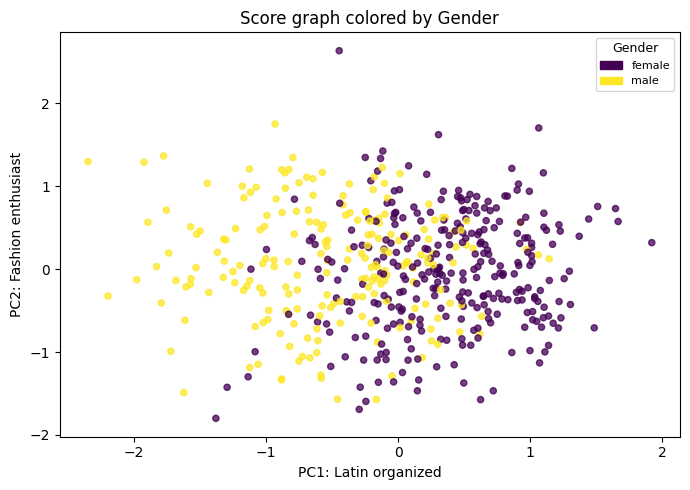

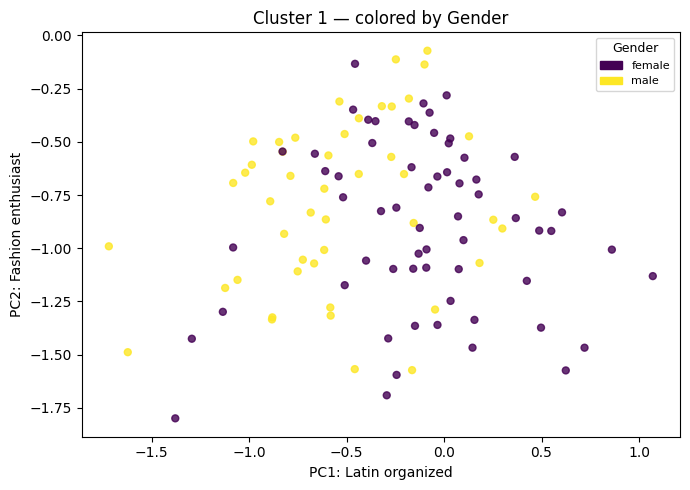

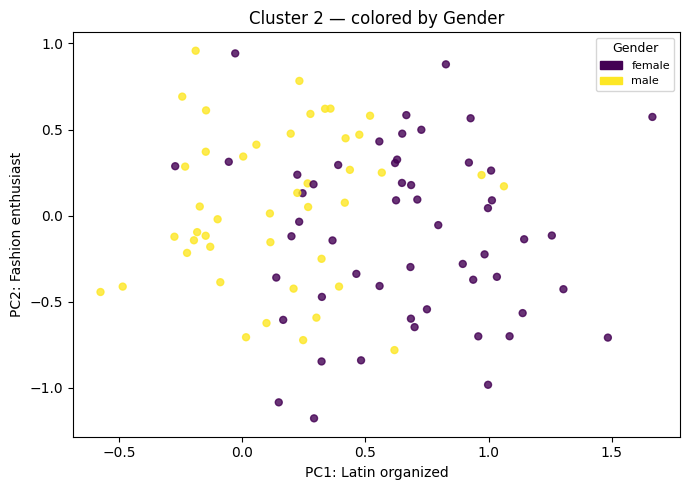

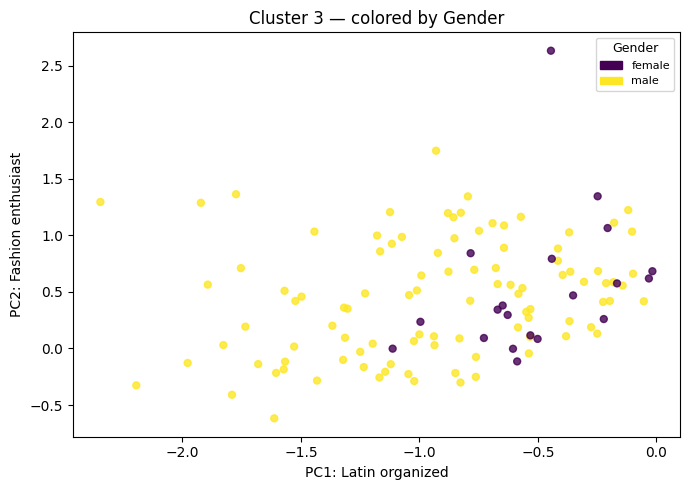

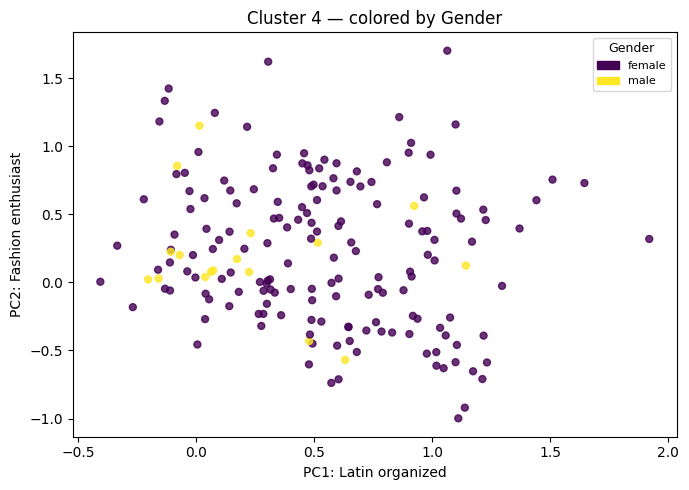

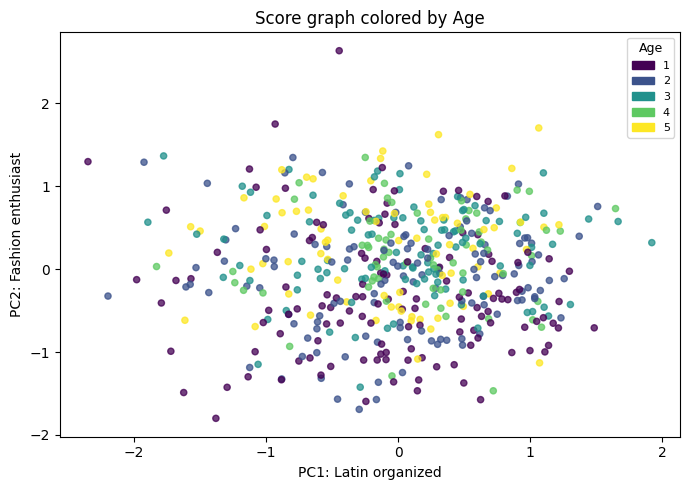

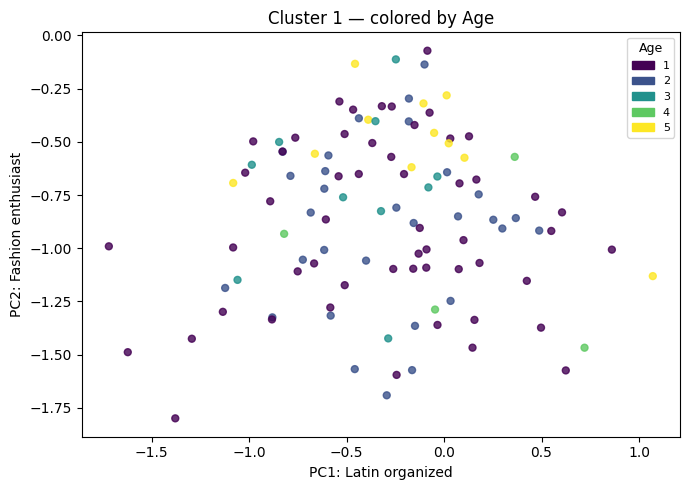

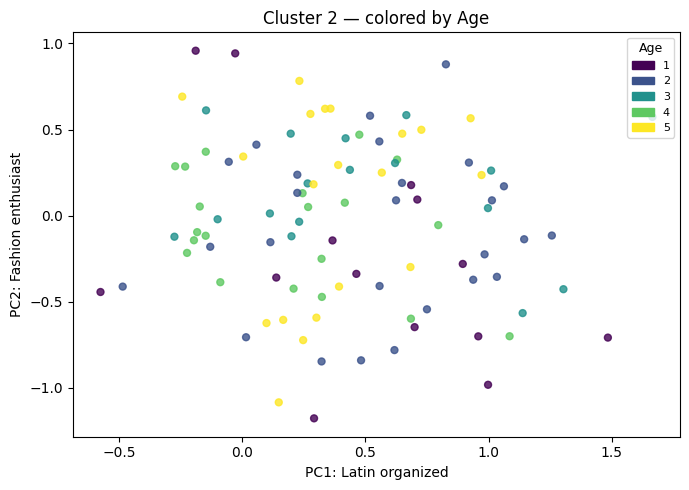

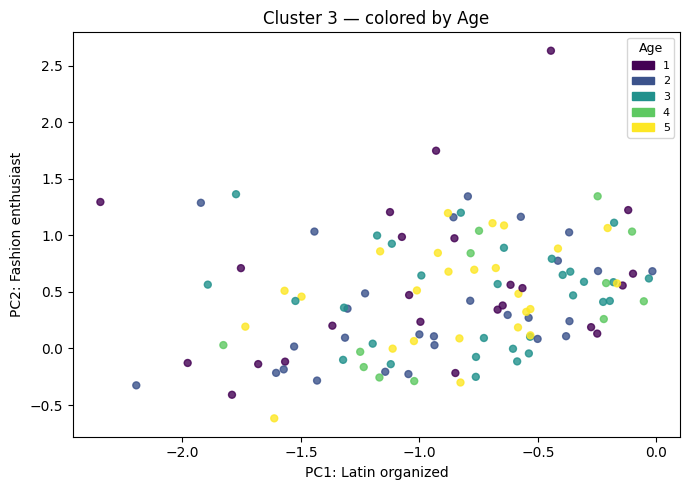

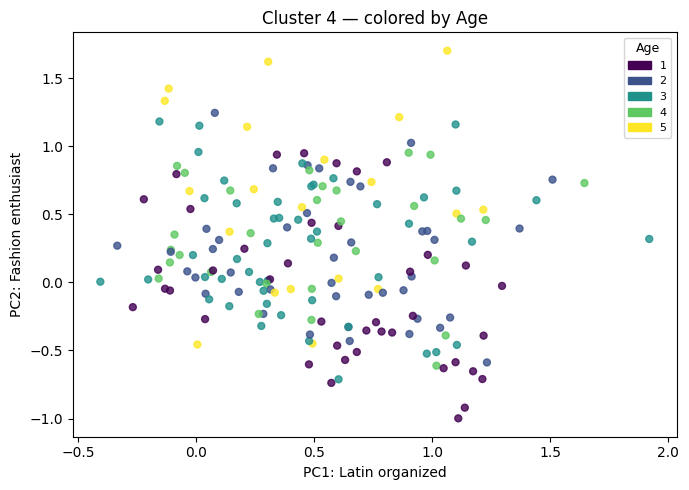

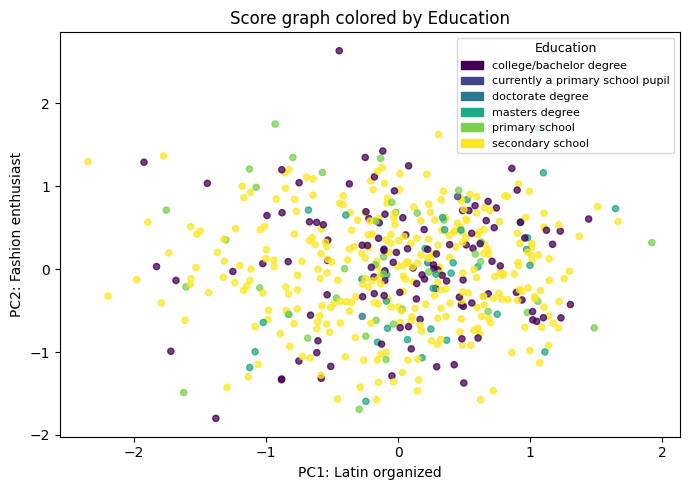

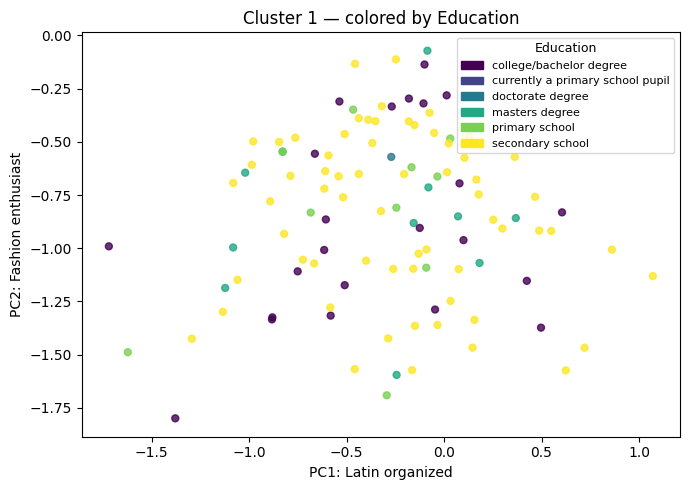

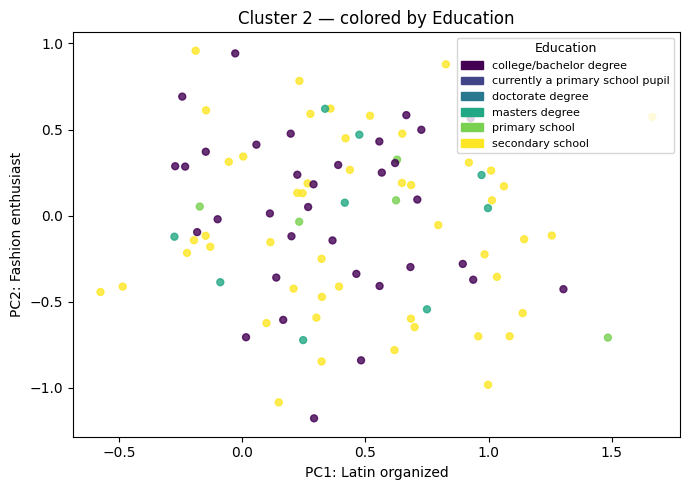

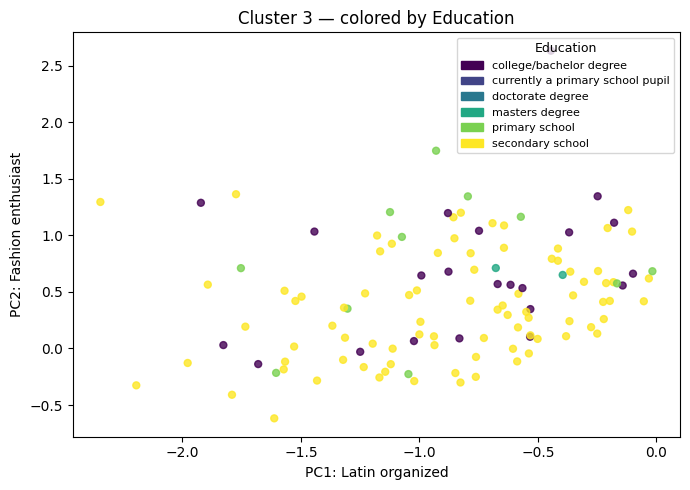

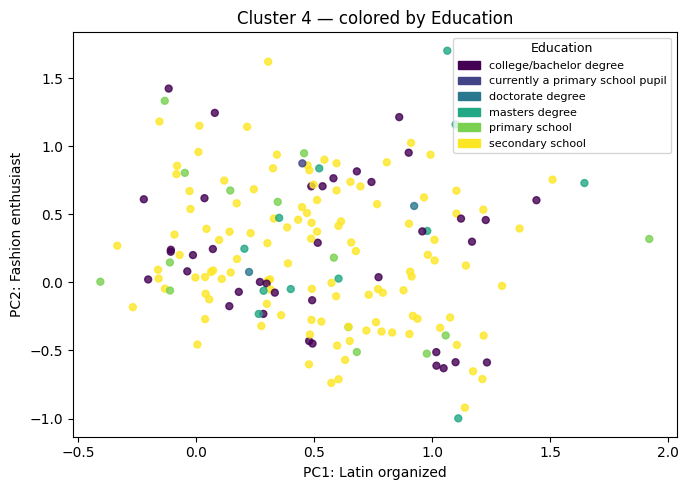

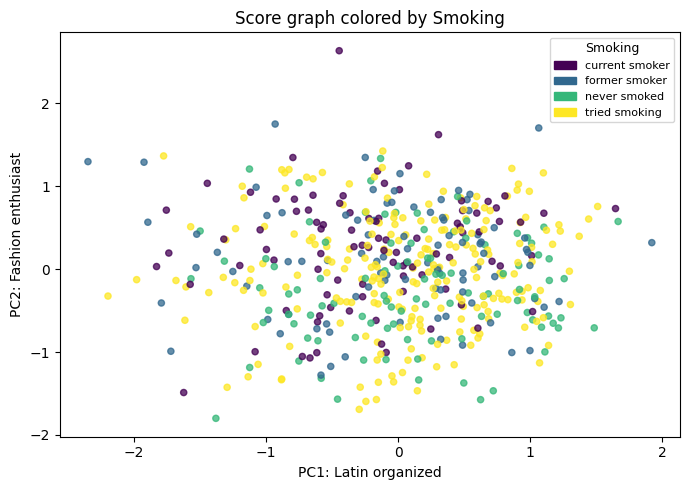

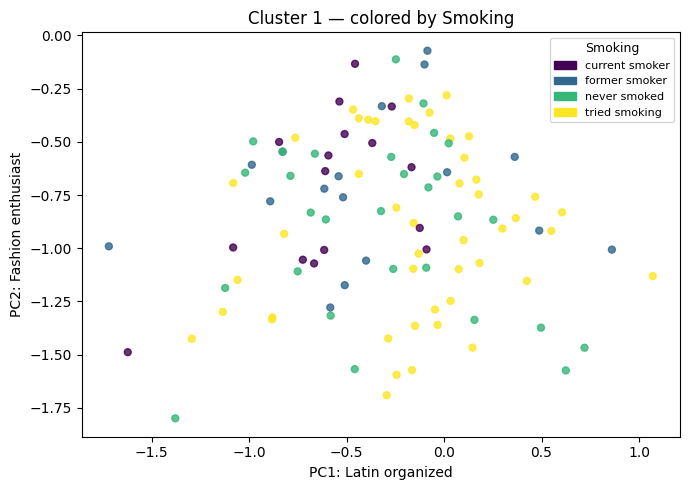

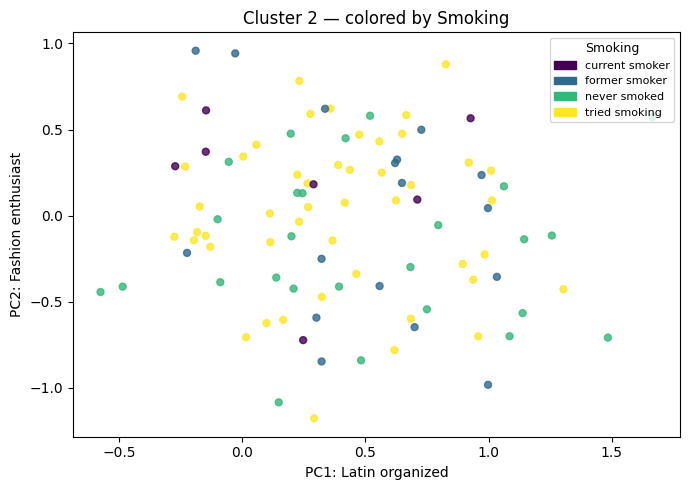

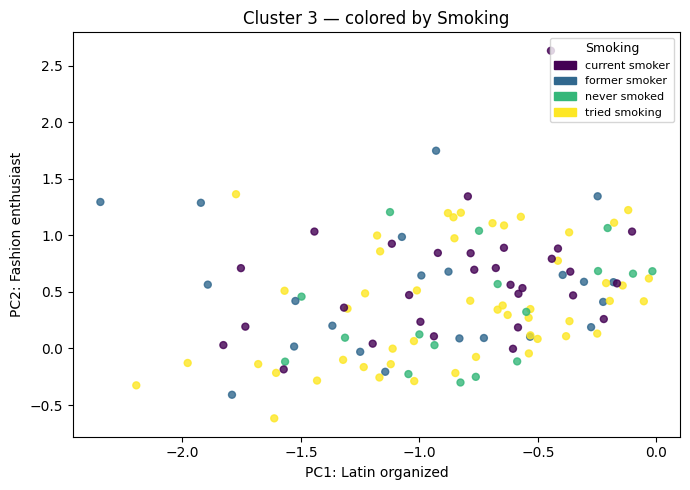

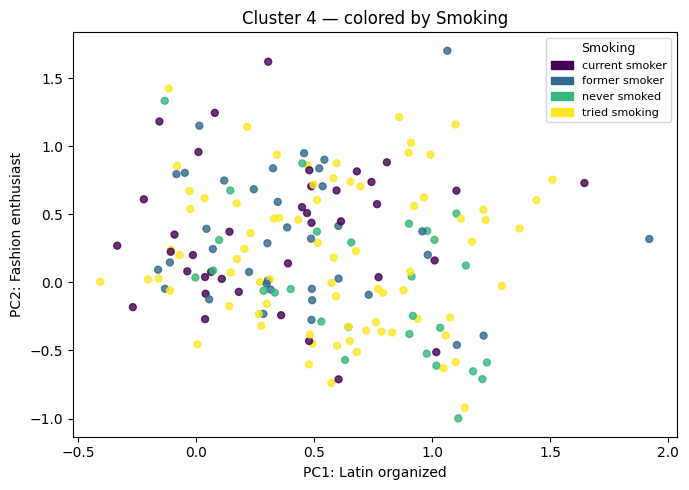

In [23]:
TARGET_LABELS = ["Gender", "Age", "Education", "Smoking", "Online Time"]

def map_labels_to_columns(columns_hw, target_labels):
    mapping = {}
    originals = columns_hw["original"].str.lower().fillna("")

    for label in target_labels:
        hits = columns_hw[originals.str.contains(label.lower(), regex=False)]
        if len(hits) > 0:
            mapping[label] = hits.iloc[0]["short"]

    return mapping


label_column_map = map_labels_to_columns(columns_hw, TARGET_LABELS)

# PCA scores and cluster labels (already computed)
scores = pca_result_mm
clusters = labels_mm

for label_name, col in label_column_map.items():
    label_values = responses_hw.loc[responses_ft_pp.index, col]

    plot_scoregraphs_by_cluster_colored_by_label(
        scores=scores,
        clusters=clusters,
        label_values=label_values,
        label_name=label_name,
        pc_names=['Latin organized', 'Fashion enthusiast']  # PC1 / PC2
    )

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

## Gender:
From the overall distribution in the bar plot, it can be seen that females are a bit more dominant. In clusters 1 and 2, the distribution is mostly uniform, males are significantly more in cluster 3 and females are significantly more in cluster 4.

## Education:
The overall distribution of education levels is highly unbalanced with secondary school and college/bachelor degree representing the majority of the dataset while postgraduate levels are relatively rare. Some clusters show a higher proportion of individuals with
college or higher education whereas others are dominated by secondary school education. Also no cluster is exclusively associated with a single education level and all are heterogeneous

## Time Online:
From the overall distribution we see that most individuals spend a few hours per day online. All clusters are dominated by moderate usage, but noticeable difference emerges in the secondary categories. In particular some clusters show a higher proportion of heavy internet users while others include a larger share of low-usage individuals.

## Smoking:
The overall distribution of smoking behaviour indicates that most individuals have either tried smoking or have never smokes, while current and former smokers represent smaller but comparable portions of the dataset. All clusters exhibit a mixture of smoking categories, with no cluster being dominated by a single smoking status.

## Age:
Form the overall distribution a higher concentration of individuals in the lower age categories can be observed. Cluster 1 is skewed more towards younger age categories while clusters 2,3 and 4 exhibit higher median age values and border age ranges. Since all clusters display substantial overlap, we can deduce that age alone does not sharply separate the clusters

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

Exercise 6 — Internal evaluation (MinMax / responses_ft_pp)
------------------------------------------------------------
Overall silhouette score: 0.1583


cluster_display  avg_silhouette
0                1        0.141746
1                2        0.184770
2                3        0.146700
3                4        0.161651

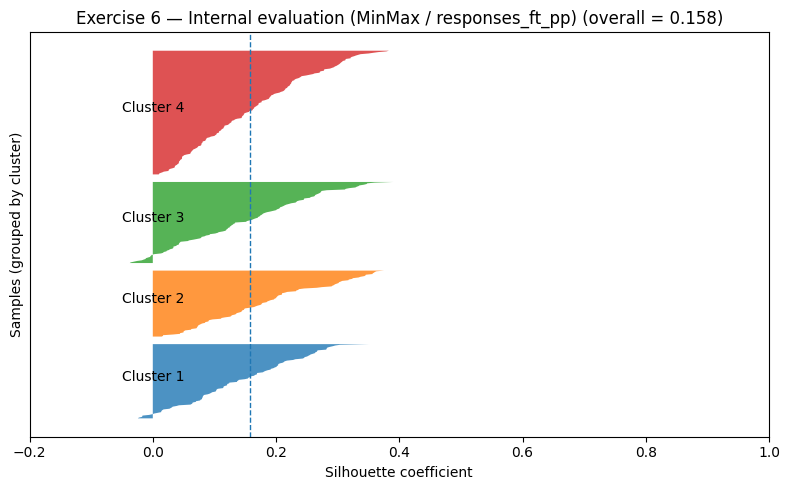

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

def internal_silhouette_evaluation(X, labels, title="Silhouette analysis"):

    labels = np.asarray(labels)
    n_clusters = len(np.unique(labels))

    # ---- 1) Overall silhouette score ----
    overall = silhouette_score(X, labels)
    print(f"{title}")
    print("-" * 60)
    print(f"Overall silhouette score: {overall:.4f}")

    # 2) Per-sample and per-cluster silhouette
    sample_sil = silhouette_samples(X, labels)

    per_cluster_avg = []
    for c in sorted(np.unique(labels)):
        avg_c = sample_sil[labels == c].mean()
        per_cluster_avg.append((c, avg_c))

    per_cluster_df = pd.DataFrame(per_cluster_avg, columns=["cluster", "avg_silhouette"])
    # Display clusters as 1..K for readability
    per_cluster_df["cluster_display"] = per_cluster_df["cluster"] + 1
    display(per_cluster_df[["cluster_display", "avg_silhouette"]])

    # 3) Silhouette plot (cluster-wise + overall reference)
    fig, ax = plt.subplots(figsize=(8, 5))

    y_lower = 10
    for c in sorted(np.unique(labels)):
        sil_vals = sample_sil[labels == c]
        sil_vals.sort()

        size_c = sil_vals.shape[0]
        y_upper = y_lower + size_c

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            sil_vals,
            alpha=0.8
        )

        ax.text(-0.05, y_lower + 0.5 * size_c, f"Cluster {c+1}")
        y_lower = y_upper + 10

    ax.axvline(overall, linestyle="--", linewidth=1)
    ax.set_title(f"{title} (overall = {overall:.3f})")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Samples (grouped by cluster)")
    ax.set_yticks([])  # cleaner look

    # silhouette scores are in [-1, 1], but set reasonable bounds
    ax.set_xlim([-0.2, 1.0])

    plt.tight_layout()
    plt.show()

    return overall, per_cluster_df

overall_sil, per_cluster_sil_df = internal_silhouette_evaluation(
    X=pca_result_mm,
    labels=labels_mm,
    title="Exercise 6 — Internal evaluation (MinMax / responses_ft_pp)"
)


#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

The overall silhouette score is relatively low (~ 0.16) indicating limited separation among the clusters and a considerable overlap in the PCA space. This could have been seen previously when we were observing the positive & negative features attributed to each centroid, the score graphs and the bar plots for the labels.

Overall the results suggest that the clusteing captures some structure in the data but the separation between clusters remains moderate than strong